###**Importing** **Required** **Libraries**

In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math

### **Loading** **and** **understanding** **the** **data**

In [5]:
train_claim=pd.read_csv("/content/Train_Claim.csv",na_values=['?','-5','MISSINGVALUE','MISSEDDATA'])
train_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481


In [6]:
train_demo=pd.read_csv("/content/Train_Demographics.csv",na_values=['NA'])
train_demo.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [7]:
train_policy=pd.read_csv("/content/Train_Policy.csv",na_values=['-1','MISSINGVAL','NA'])
train_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [8]:
train_vehicle=pd.read_csv("/content/Train_Vehicle.csv",na_values=['???'])
train_vehicle.tail()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680
115343,Cust14156,VehicleModel,Corolla


In [9]:
train_target= pd.read_csv("/content/Traindata_with_Target.csv")
train_target.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [10]:
def shape(x):
  return x.shape

In [11]:
shape(train_claim)

(28836, 19)

In [12]:
print("shape_of_train_vehicle",shape(train_vehicle))
print("shape_of_train_policy",shape(train_policy))
print("shape_of_train_claim",shape(train_claim))
print("shape_of_train_demo",shape(train_demo))

shape_of_train_vehicle (115344, 3)
shape_of_train_policy (28836, 10)
shape_of_train_claim (28836, 19)
shape_of_train_demo (28836, 10)


In [13]:
#### def func(x):
         # return x["CustomerID"].nunique()


In [14]:
### func(train_policy)

In [15]:
## def count(x):
  ## return x["CustomerID"].nunique()

In [16]:
### count(train_demo)

In [17]:
##print("train_vehicle",count(train_vehicle))
##print("train_policy",count(train_policy))
##print("train_claim",count(train_claim))
##print("train_demo",count(train_demo))

In [18]:
##print("train_vehicle",func(train_vehicle))
##print("train_policy",func(train_policy))
##print("train_claim",func(train_claim))
##print("train_demo",func(train_demo))

### **trainvehicledata**

In [19]:
train_vehicle["VehicleAttribute"].describe()

count        115344
unique            4
top       VehicleID
freq          28836
Name: VehicleAttribute, dtype: object

In [20]:
train_vehicle["VehicleAttribute"].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [21]:
#### we observe that there are four attributes taken as one attribute 
#### so, we can split it in to four different columns by corresponding values 

In [22]:
vehicle_id= train_vehicle.query('VehicleAttribute=="VehicleID"')
vehicle_Model= train_vehicle.query('VehicleAttribute=="VehicleModel"')
vehicle_Make= train_vehicle.query('VehicleAttribute=="VehicleMake"')
vehicle_YOM= train_vehicle.query('VehicleAttribute=="VehicleYOM"')

Here, we use query command to divide the train vehicle data based upon their attributes in to separate entities **VehicleID VehicleModel VehicleMake VehicleYOM**. Now the number of rows of the all the train data is same. Now, later we will merge all of them using a common entity.

In [23]:
train_vehicle.shape

(115344, 3)

In [24]:
vehicle_Model.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
1,Cust21384,VehicleModel,Malibu
3,Cust27118,VehicleModel,Neon
6,Cust30237,VehicleModel,RAM
27,Cust23684,VehicleModel,Neon
33,Cust35737,VehicleModel,Wrangler


In [25]:
vehicle_id= vehicle_id.rename(columns={'VehicleAttributeDetails': 'vehicle_id'})
vehicle_Make= vehicle_Make.rename(columns={'VehicleAttributeDetails': 'vehicle_Make'})
vehicle_YOM= vehicle_YOM.rename(columns={'VehicleAttributeDetails': 'vehicle_YOM'})
vehicle_Model= vehicle_Model.rename(columns={'VehicleAttributeDetails': 'vehicle_Model'})


In [26]:
vehicle_Make.head()

,CustomerID,VehicleAttribute,vehicle_Make
2,Cust33335,VehicleMake,Toyota
9,Cust20624,VehicleMake,Chevrolet
13,Cust9006,VehicleMake,Accura
15,Cust18447,VehicleMake,Honda
20,Cust17021,VehicleMake,BMW


In [27]:
vehicle_YOM.head()

,CustomerID,VehicleAttribute,vehicle_YOM
7,Cust21334,VehicleYOM,1996
8,Cust26634,VehicleYOM,1999
11,Cust21432,VehicleYOM,2002
12,Cust22845,VehicleYOM,2000
14,Cust30659,VehicleYOM,2003


In [28]:
vehicle_id=vehicle_id.drop(["VehicleAttribute"],axis=1)
vehicle_Model=vehicle_Model.drop(["VehicleAttribute"],axis=1)
vehicle_YOM=vehicle_YOM.drop(["VehicleAttribute"],axis=1)
vehicle_Make=vehicle_Make.drop(["VehicleAttribute"],axis=1)

In [29]:
vehicle_Model.head()

,CustomerID,vehicle_Model
1,Cust21384,Malibu
3,Cust27118,Neon
6,Cust30237,RAM
27,Cust23684,Neon
33,Cust35737,Wrangler


In [30]:
### merging the splitted columns
merged_df = pd.merge(vehicle_Make,vehicle_YOM,on='CustomerID')
merged_df1 = pd.merge(vehicle_Model,vehicle_id,on='CustomerID')
vehicle_train=pd.merge(merged_df,merged_df1,on='CustomerID')

In [31]:
vehicle_train.shape

(28836, 5)

In [32]:
vehicle_train.head()

,CustomerID,vehicle_Make,vehicle_YOM,vehicle_Model,vehicle_id
0,Cust33335,Toyota,2001,Highlander,Vehicle8998
1,Cust20624,Chevrolet,2007,Malibu,Vehicle10465
2,Cust9006,Accura,2013,TL,Vehicle32135
3,Cust18447,Honda,1997,Civic,Vehicle17863
4,Cust17021,BMW,1999,M5,Vehicle38513


In [33]:
vehicle_train = vehicle_train.sort_values(by='CustomerID')

In [34]:
vehicle_train.head()

,CustomerID,vehicle_Make,vehicle_YOM,vehicle_Model,vehicle_id
24478,Cust10000,Audi,2008,A5,Vehicle26917
16609,Cust10001,Audi,2006,A5,Vehicle15893
25113,Cust10002,Volkswagen,1999,Jetta,Vehicle5152
4242,Cust10003,Volkswagen,2003,Jetta,Vehicle37363
21271,Cust10004,Toyota,2010,CRV,Vehicle28633


### **Merging all the train data**

In [35]:
combined_train=train_claim.merge(train_demo, on="CustomerID").merge(train_policy, on="CustomerID").merge(vehicle_train, on="CustomerID").merge(train_target, on="CustomerID")

In [36]:
combined_train.head()  ### to see whether the data is perfectly merged or not

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,vehicle_Make,vehicle_YOM,vehicle_Model,vehicle_id,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,100/300,1000,1632.73,0,not-in-family,Audi,2008,A5,Vehicle26917,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,100/300,1000,1255.19,0,not-in-family,Audi,2006,A5,Vehicle15893,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,500/1000,617,1373.38,0,wife,Volkswagen,1999,Jetta,Vehicle5152,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,500/1000,722,1337.60,0,own-child,Volkswagen,2003,Jetta,Vehicle37363,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,100/300,500,1353.73,4279863,unmarried,Toyota,2010,CRV,Vehicle28633,N


### **Splitting the DateOfIncident and DateOfPolicyCoverage attributes to day,month and year**

In [37]:
combined_train['year_of_Date_of_incident']=combined_train['DateOfIncident'].apply(lambda x:x.split('-')[0])
combined_train['month_of_Date_of_incident']=combined_train['DateOfIncident'].apply(lambda x:x.split('-')[1])
combined_train['day_of_Date_of_incident']=combined_train['DateOfIncident'].apply(lambda x:x.split('-')[2])

In [38]:
combined_train['year_of_Date_of_policy_coverage']=combined_train['DateOfPolicyCoverage'].apply(lambda x:x.split('-')[0])
combined_train['month_of_Date_of_policy_coverage']=combined_train['DateOfPolicyCoverage'].apply(lambda x:x.split('-')[1])
combined_train['day_of_Date_of_policy_coverage']=combined_train['DateOfPolicyCoverage'].apply(lambda x:x.split('-')[2])

### **Splitting Policy_CombinedSingleLimit attribute**

In the **Policy_CombinedSingleLimit** attribute the values are in the form of **250/500** it is the combination of **bodily injury** and **total amount per accident**

**For Example**
In auto insurance, liability limits are offered as a single limit or, as in your case, “split limits”. The $250,000/$500,000 allows a payment of up to $250,000 per person for bodily injury and a total of $500,000 per accident.

In [39]:
combined_train['Policy_CombinedSingleLimit']  ### to see how the values are

0         100/300
1         100/300
2        500/1000
3        500/1000
4         100/300
           ...   
28831    500/1000
28832     100/300
28833     250/500
28834     250/500
28835    500/1000
Name: Policy_CombinedSingleLimit, Length: 28836, dtype: object

In [40]:
combined_train['amount_of_bodily_injured']=combined_train['Policy_CombinedSingleLimit'].apply(lambda x:x.split('/')[0])
combined_train['total_amount_per_accident']=combined_train['Policy_CombinedSingleLimit'].apply(lambda x:x.split('/')[1])

In [41]:

combined_train.head()   ### check whether they are correctly splitted or not

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,vehicle_id,ReportedFraud,year_of_Date_of_incident,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,Vehicle26917,N,2015,02,03,1998,10,25,100,300
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,Vehicle15893,N,2015,02,02,2000,11,15,100,300
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,Vehicle5152,N,2015,01,15,2001,02,12,500,1000
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,Vehicle37363,N,2015,01,19,2005,04,11,500,1000
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,Vehicle28633,N,2015,01,09,1996,10,25,100,300


In [42]:
combined_train.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'vehicle_Make', 'vehicle_YOM', 'vehicle_Model', 'vehicle_id',
       'ReportedFraud', 'year_of_Date_of_incident',
       'month_of_Date_of_incident', 'day_of_Date_of_incident',
 

###**Examining IncidentState column with respect to ReportedFraud**

In [43]:
fraud_yes = combined_train[combined_train["ReportedFraud"]== 'Y']
fraud_no = combined_train[combined_train["ReportedFraud"]== 'N']

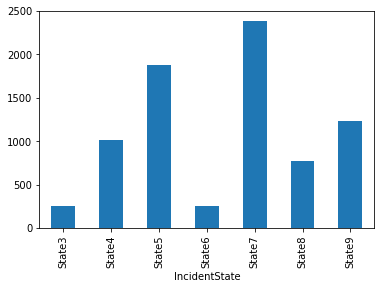

In [44]:
counts = fraud_yes.groupby('IncidentState')["ReportedFraud"].count()
counts.plot(kind='bar')
plt.show()

1) In state7 frauds are more when compared to other states

2) state3 and state6 experienced the less frauds


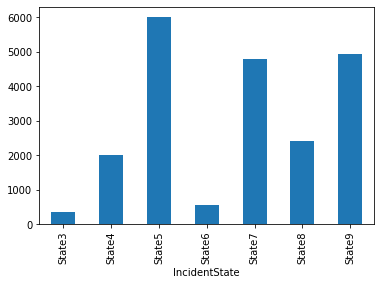

In [45]:
counts = fraud_no.groupby('IncidentState')["ReportedFraud"].count()
counts.plot(kind='bar')
plt.show()

### **Combining state and city columns**

In [46]:
combined_train['State_city'] = combined_train['IncidentState'].astype(str) + combined_train['IncidentCity']

In [47]:
combined_train.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,ReportedFraud,year_of_Date_of_incident,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,...,N,2015,02,03,1998,10,25,100,300,State7City1
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,...,N,2015,02,02,2000,11,15,100,300,State7City5
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,...,N,2015,01,15,2001,02,12,500,1000,State8City6
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,...,N,2015,01,19,2005,04,11,500,1000,State9City6
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,...,N,2015,01,09,1996,10,25,100,300,State8City6


### **Representing Y and N in ReportedFraud attribute as 1 and 0**

In [48]:
combined_train["ReportedFraud"] = combined_train["ReportedFraud"].replace (to_replace = ['Y','N'],value = ['1','0']).astype("int64")

In [49]:
combined_train["ReportedFraud"]  ### to check whether changed or not

0        0
1        0
2        0
3        0
4        0
        ..
28831    0
28832    0
28833    0
28834    0
28835    0
Name: ReportedFraud, Length: 28836, dtype: int64

### **checking the datatypes of the attributes**



In [50]:
combined_train.dtypes

CustomerID                           object
DateOfIncident                       object
TypeOfIncident                       object
TypeOfCollission                     object
SeverityOfIncident                   object
AuthoritiesContacted                 object
IncidentState                        object
IncidentCity                         object
IncidentAddress                      object
IncidentTime                        float64
NumberOfVehicles                      int64
PropertyDamage                       object
BodilyInjuries                        int64
Witnesses                           float64
PoliceReport                         object
AmountOfTotalClaim                  float64
AmountOfInjuryClaim                   int64
AmountOfPropertyClaim                 int64
AmountOfVehicleDamage                 int64
InsuredAge                            int64
InsuredZipCode                        int64
InsuredGender                        object
InsuredEducationLevel           

### **Changing the datatypes**

In [51]:
combined_train["DateOfIncident"] = combined_train["DateOfIncident"].astype('datetime64') 
combined_train["DateOfPolicyCoverage"] = combined_train["DateOfPolicyCoverage"].astype('datetime64')

In [52]:
for col in['CustomerID', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
           'IncidentAddress', 'PropertyDamage', 'PoliceReport','InsuredZipCode','InsuredGender','InsuredEducationLevel', 'InsuredOccupation',
           'InsuredHobbies', 'Country', 'InsurancePolicyState', 'InsuredRelationship','vehicle_Make', 'vehicle_Model', 'vehicle_id', 'ReportedFraud',
           'month_of_Date_of_incident', 'month_of_Date_of_policy_coverage','State_city']:
    combined_train[col]= combined_train[col].astype('category')

In [53]:
for col in['total_amount_per_accident', 'amount_of_bodily_injured', 'year_of_Date_of_incident', 'day_of_Date_of_policy_coverage', 'year_of_Date_of_policy_coverage', 'day_of_Date_of_incident', 'vehicle_YOM',]:
    combined_train[col]= combined_train[col].astype('int64')

In [54]:
combined_train.dtypes   ### check whether the dtypes changed or not

CustomerID                                category
DateOfIncident                      datetime64[ns]
TypeOfIncident                            category
TypeOfCollission                          category
SeverityOfIncident                        category
AuthoritiesContacted                      category
IncidentState                             category
IncidentCity                              category
IncidentAddress                           category
IncidentTime                               float64
NumberOfVehicles                             int64
PropertyDamage                            category
BodilyInjuries                               int64
Witnesses                                  float64
PoliceReport                              category
AmountOfTotalClaim                         float64
AmountOfInjuryClaim                          int64
AmountOfPropertyClaim                        int64
AmountOfVehicleDamage                        int64
InsuredAge                     

### **Separating numerical and categorical columns**

In [55]:
numericalcolumns=[]
categoricalcolumns=[]
datetypecolumns=[]
for i in combined_train.columns:
  if combined_train[i].dtypes=="category":
    categoricalcolumns.append(i)
  elif combined_train[i].dtypes=="datetime64[ns]": 
    datetypecolumns.append(i) 
  else:
    numericalcolumns.append(i)    

In [56]:
print(categoricalcolumns)
print(numericalcolumns)
print(datetypecolumns)

['CustomerID', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'PoliceReport', 'InsuredZipCode', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'Country', 'InsurancePolicyState', 'InsuredRelationship', 'vehicle_Make', 'vehicle_Model', 'vehicle_id', 'ReportedFraud', 'month_of_Date_of_incident', 'month_of_Date_of_policy_coverage', 'State_city']
['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'InsurancePolicyNumber', 'CustomerLoyaltyPeriod', 'Policy_CombinedSingleLimit', 'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit', 'vehicle_YOM', 'year_of_Date_of_incident', 'day_of_Date_of_incident', 'year_of_Date_of_policy_coverage', 'day_of_Date_of_policy_coverage', 'amount_of_bodily_injured',

**Checking cardinality**

In [57]:
combined_train.nunique()      

CustomerID                          28836
DateOfIncident                         72
TypeOfIncident                          4
TypeOfCollission                        3
SeverityOfIncident                      4
AuthoritiesContacted                    5
IncidentState                           7
IncidentCity                            7
IncidentAddress                      1000
IncidentTime                           24
NumberOfVehicles                        4
PropertyDamage                          2
BodilyInjuries                          3
Witnesses                               4
PoliceReport                            2
AmountOfTotalClaim                  21975
AmountOfInjuryClaim                 11958
AmountOfPropertyClaim               11785
AmountOfVehicleDamage               20041
InsuredAge                             46
InsuredZipCode                        995
InsuredGender                           2
InsuredEducationLevel                   7
InsuredOccupation                 

### **Dropping unwanted columns**

**Reasons for dropping columns**

'InsurancePolicyNumber'(this column is redundant and may not be useful for our analysis so we should drop it)

'InsuranceZipcode'(this column is redundant and may not be useful for our analysis so we should drop it)

'vehicle_id'(this column haves so many uniquevalues so we can drop it)

'IncidentAddress'(this column haves so many uniquevalues so we can drop it)

'InsuredOccupation'(this column haves so many uniquevalues so we can drop it)

'InsuredHobbies'(this column haves so many uniquevalues so we can drop it)

Country'(this column haves so many uniquevalues so we can drop it)



In [58]:
combined_train= combined_train.drop(['CustomerID', 'DateOfIncident', 'IncidentAddress'
                                     ,'InsurancePolicyNumber', 'DateOfPolicyCoverage', 'Policy_CombinedSingleLimit'
                                     , 'vehicle_id', 'Country', 'year_of_Date_of_incident','IncidentState','IncidentCity' ],axis=1)

In [59]:
combined_train.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,vehicle_Model,ReportedFraud,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17.0,3,NaN,1,0.0,NaN,...,A5,0,02,3,1998,10,25,100,300,State7City1
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10.0,3,YES,2,1.0,YES,...,A5,0,02,2,2000,11,15,100,300,State7City5
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,YES,2,3.0,NO,...,Jetta,0,01,15,2001,02,12,500,1000,State8City6
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,YES,2,3.0,NO,...,Jetta,0,01,19,2005,04,11,500,1000,State9City6
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10.0,1,NO,2,1.0,YES,...,CRV,0,01,9,1996,10,25,100,300,State8City6


In [60]:
# Getting basic statistical details of the data frame
combined_train.describe().astype("int")

,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,...,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,vehicle_YOM,day_of_Date_of_incident,year_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident
count,28805,28836,28836,28790,28786,28836,28836,28836,28836,28836,...,28836,28836,28695,28836,28836,28836,28836,28836,28836,28836
mean,11,1,0,1,52308,7337,7283,37687,38,23066,...,203,1114,1261,983668,2005,15,2001,15,274,583
std,6,0,0,1,25101,4427,4375,17977,7,27637,...,99,546,205,1969282,5,7,6,7,161,288
min,0,1,0,0,150,0,0,109,19,0,...,1,500,436,-1000000,1995,1,1990,1,100,300
25%,6,1,0,1,44643,4743,4862,32193,33,0,...,126,622,1124,0,2001,9,1996,9,100,300
50%,12,1,1,1,58360,7147,7051,42457,38,0,...,199,1000,1266,0,2005,15,2001,16,250,500
75%,17,3,2,2,68982,10571,10327,49535,44,49000,...,267,1627,1397,485961,2010,21,2007,22,500,1000
max,23,4,2,3,114920,21450,23670,79560,64,100500,...,479,2000,2047,10000000,2015,31,2015,31,500,1000


comments:

### **Checking null values**

In [61]:
combined_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   TypeOfIncident                    28836 non-null  category
 1   TypeOfCollission                  23674 non-null  category
 2   SeverityOfIncident                28836 non-null  category
 3   AuthoritiesContacted              28836 non-null  category
 4   IncidentTime                      28805 non-null  float64 
 5   NumberOfVehicles                  28836 non-null  int64   
 6   PropertyDamage                    18377 non-null  category
 7   BodilyInjuries                    28836 non-null  int64   
 8   Witnesses                         28790 non-null  float64 
 9   PoliceReport                      19031 non-null  category
 10  AmountOfTotalClaim                28786 non-null  float64 
 11  AmountOfInjuryClaim               28836 non-null  int6

In [62]:
combined_train.isnull().sum()

TypeOfIncident                          0
TypeOfCollission                     5162
SeverityOfIncident                      0
AuthoritiesContacted                    0
IncidentTime                           31
NumberOfVehicles                        0
PropertyDamage                      10459
BodilyInjuries                          0
Witnesses                              46
PoliceReport                         9805
AmountOfTotalClaim                     50
AmountOfInjuryClaim                     0
AmountOfPropertyClaim                   0
AmountOfVehicleDamage                   0
InsuredAge                              0
InsuredZipCode                          0
InsuredGender                          30
InsuredEducationLevel                   0
InsuredOccupation                       0
InsuredHobbies                          0
CapitalGains                            0
CapitalLoss                             0
CustomerLoyaltyPeriod                   0
InsurancePolicyState              

In [63]:
null_counts=combined_train.isnull ().sum ()

Sorting the attributes with null values

In [64]:
null_counts[null_counts > 0].sort_values (ascending=False)

PropertyDamage         10459
PoliceReport            9805
TypeOfCollission        5162
PolicyAnnualPremium      141
AmountOfTotalClaim        50
vehicle_Make              50
Witnesses                 46
IncidentTime              31
InsuredGender             30
dtype: int64

**To see the rows containing null values in a specific column**

In [65]:
null_mask=combined_train['Witnesses'].isnull()

In [66]:
null_rows=combined_train[null_mask]

In [67]:
display(null_rows)

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,vehicle_Model,ReportedFraud,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
1084,Parked Car,NaN,Minor Damage,None,5.0,1,NaN,1,NaN,NO,...,M5,0,01,17,1995,08,19,100,300,State9City1
1146,Multi-vehicle Collision,Rear Collision,Major Damage,Police,13.0,3,NO,2,NaN,YES,...,MDX,0,02,4,1994,11,18,500,1000,State5City4
2010,Parked Car,NaN,Trivial Damage,None,10.0,1,NaN,2,NaN,YES,...,Ultima,0,02,2,2007,01,27,500,1000,State7City3
2075,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,11.0,2,NO,1,NaN,NO,...,A5,0,02,15,1995,12,7,250,500,State7City1
2202,Vehicle Theft,NaN,Minor Damage,None,7.0,1,NaN,1,NaN,NO,...,TL,0,01,10,1998,11,23,250,500,State8City4
3673,Multi-vehicle Collision,Front Collision,Major Damage,Ambulance,1.0,3,NaN,1,NaN,NaN,...,Impreza,0,01,10,1994,05,4,250,300,State5City3
3917,Parked Car,NaN,Trivial Damage,Police,9.0,1,NO,2,NaN,YES,...,3 Series,0,02,3,2012,06,2,250,500,State5City3
4251,Multi-vehicle Collision,Side Collision,Major Damage,Police,23.0,3,NaN,0,NaN,NaN,...,Passat,0,01,12,1993,06,18,250,500,State5City7
4873,Multi-vehicle Collision,Front Collision,Minor Damage,Fire,13.0,3,NO,1,NaN,NO,...,Wrangler,0,02,15,2003,07,16,250,300,State4City3
5345,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,4.0,3,YES,2,NaN,YES,...,CRV,0,02,16,1990,09,16,100,300,State7City1


###**Identification of suitable imputation to the columns**

Lets start with **PropertyDamage**



In [68]:
combined_train["PropertyDamage"].value_counts()
#we cannot replace here with mode because if we observe valuecounts they are almost near to each other
# so we have to find a solution for it by checking its relation with other columns too..

NO     9687
YES    8690
Name: PropertyDamage, dtype: int64

Almost 10459 missing values in **PropertyDamage**

2) **PoliceReport**

In [69]:
combined_train["PoliceReport"].value_counts()
#we cannot replace here with mode because if we observe valuecounts they are almost near to each other
# so we have to find a solution for it by checking its relation with other columns too..

NO     9898
YES    9133
Name: PoliceReport, dtype: int64

Almost 9805 missing values in **PoliceReport**

3) **TypeOfCollission**

In [70]:
combined_train["TypeOfCollission"].value_counts()
#we cant decide here also 

Rear Collision     8561
Side Collision     7867
Front Collision    7246
Name: TypeOfCollission, dtype: int64

Almost 5162 missing values in **TypeOfCollission**

4) **PolicyAnnualPremium**

<Axes: xlabel='PolicyAnnualPremium', ylabel='Density'>

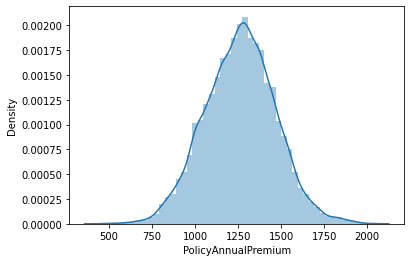

In [71]:
#for policyannaulpremium we can see through dist plot that our column data is normally distributed so we 
#can impute with mean
sns.distplot(combined_train["PolicyAnnualPremium"])

**AmountOfTotalClaim**

<Axes: xlabel='AmountOfTotalClaim', ylabel='Density'>

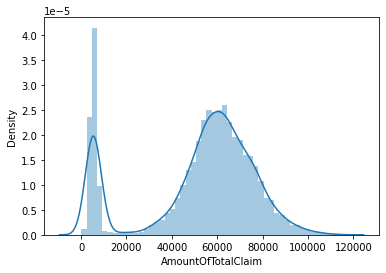

In [72]:
##for AmountOfTotalClaim we can see through dist plot that our column data is normally distributed so we 
#can impute with mean.But if we see here the data is normally distributed between 20000-120000.so there may be 
#case of outliers here.We have to check othercolumns also to ensure total claim ammount.
sns.distplot(combined_train["AmountOfTotalClaim"])

Here, we can observe that **AmountOfTotalClaim** is the sum of **AmountOfInjuryClaim+AmountOfPropertyClaim+AmountOfVehicleDamage**

In [73]:
s=combined_train[['AmountOfTotalClaim','AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage']]

In [74]:
s[s['AmountOfTotalClaim']<=20000]#as we can observe is sum of AmountOfInjuryClaim+AmountOfPropertyClaim+AmountOfVehicleDamage

,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
16,5371.0,679,521,4171
17,5408.0,689,524,4195
18,6190.0,619,1208,4363
42,6500.0,1300,650,4550
55,5892.0,857,857,4178
...,...,...,...,...
28817,4981.0,787,787,3407
28818,5183.0,1185,804,3194
28819,3589.0,701,625,2263
28830,7262.0,698,1304,5260


**vehicle_Make**

In [75]:
#for vehicle_make column
#we will use mode imputation method here
combined_train["vehicle_Make"].value_counts()

Saab          2415
Suburu        2313
Nissan        2300
Dodge         2263
Chevrolet     2174
Ford          2158
Accura        2099
BMW           2073
Toyota        1981
Volkswagen    1960
Audi          1952
Jeep          1946
Mercedes      1659
Honda         1493
Name: vehicle_Make, dtype: int64

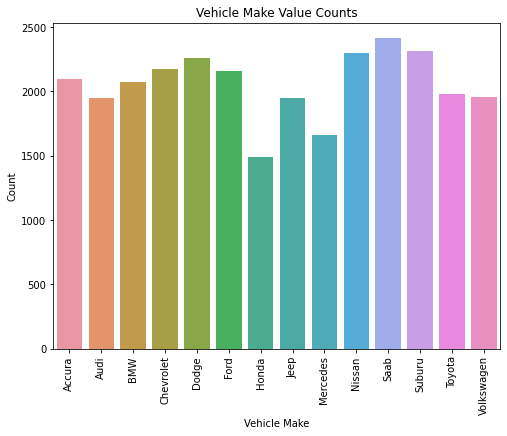

In [76]:

# Count the number of occurrences of each category
counts = combined_train["vehicle_Make"].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts)

# Set the x-axis label vertically
plt.xticks(rotation=90)

# Set the chart title and axis labels
plt.title("Vehicle Make Value Counts")
plt.xlabel("Vehicle Make")
plt.ylabel("Count")

# Show the chart
plt.show()

**Witnesses**

In [77]:
combined_train["Witnesses"].value_counts()
#WE WILL Impute this column with mode

2.0    8449
1.0    8345
0.0    6128
3.0    5868
Name: Witnesses, dtype: int64

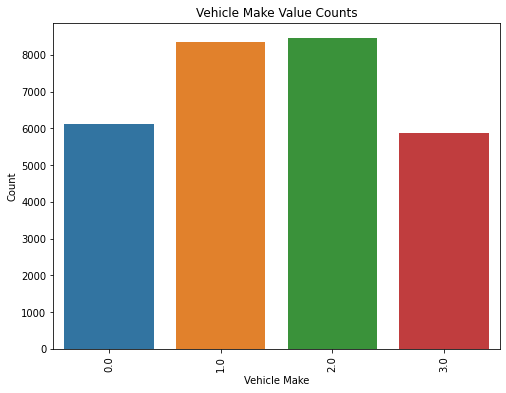

In [78]:

# Count the number of occurrences of each category
counts = combined_train["Witnesses"].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts)

# Set the x-axis label vertically
plt.xticks(rotation=90)

# Set the chart title and axis labels
plt.title("Vehicle Make Value Counts")
plt.xlabel("Vehicle Make")
plt.ylabel("Count")

# Show the chart
plt.show()

**IncidentTime**

<Axes: xlabel='IncidentTime', ylabel='Density'>

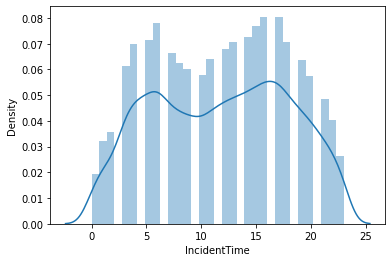

In [79]:
sns.distplot(combined_train["IncidentTime"])#we cannot clearly say whether it is normally distributed or not lets check mean and median values then 
#decide with what value should we replace


In [80]:
combined_train["IncidentTime"].describe()
#we will replace this with median value(time cannot be flot value)

count    28805.000000
mean        11.764069
std          6.148869
min          0.000000
25%          6.000000
50%         12.000000
75%         17.000000
max         23.000000
Name: IncidentTime, dtype: float64

**InsuredGender**

In [81]:
combined_train["InsuredGender"].value_counts()#we can replace here with mode

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64

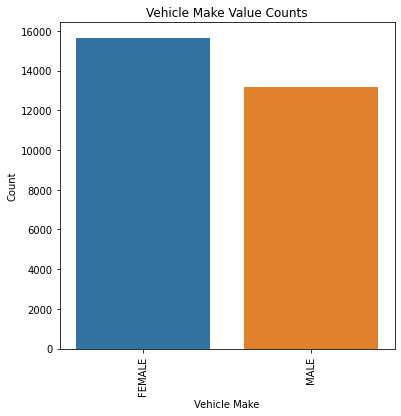

In [82]:

# Count the number of occurrences of each category
counts = combined_train["InsuredGender"].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 6))
sns.barplot(x=counts.index, y=counts)

# Set the x-axis label vertically
plt.xticks(rotation=90)

# Set the chart title and axis labels
plt.title("Vehicle Make Value Counts")
plt.xlabel("Vehicle Make")
plt.ylabel("Count")

# Show the chart
plt.show()

**Results for imputation**

so from missing value analysis we found out that

1)**InsuredGender**-can be replaced with mode because of high occurence of one value

2)**IncidentTime**-replace with median of data

3)**Witnesses**-replace with mode of that column

4)**vehicle_Make**-replace with mode of that column

5)**AmountOfTotalClaim**-sum of 

6)**PolicyAnnualPremium**-mean of that column


###**Imputation**

In [83]:
combined_train["AmountOfTotalClaim"]= combined_train["AmountOfInjuryClaim"]+combined_train["AmountOfPropertyClaim"]+combined_train["AmountOfVehicleDamage"]
combined_train["PolicyAnnualPremium"].replace(np.nan,combined_train["PolicyAnnualPremium"].mean(),inplace=True)
combined_train["Witnesses"].replace(np.nan,combined_train["Witnesses"].mode().values[0],inplace=True)
combined_train["IncidentTime"].replace(np.nan,combined_train["IncidentTime"].median(),inplace=True)

In [84]:
combined_train.isnull().sum()

TypeOfIncident                          0
TypeOfCollission                     5162
SeverityOfIncident                      0
AuthoritiesContacted                    0
IncidentTime                            0
NumberOfVehicles                        0
PropertyDamage                      10459
BodilyInjuries                          0
Witnesses                               0
PoliceReport                         9805
AmountOfTotalClaim                      0
AmountOfInjuryClaim                     0
AmountOfPropertyClaim                   0
AmountOfVehicleDamage                   0
InsuredAge                              0
InsuredZipCode                          0
InsuredGender                          30
InsuredEducationLevel                   0
InsuredOccupation                       0
InsuredHobbies                          0
CapitalGains                            0
CapitalLoss                             0
CustomerLoyaltyPeriod                   0
InsurancePolicyState              

In [85]:
impute_cols = ["InsuredGender","vehicle_Make"]

In [86]:
from sklearn.impute import SimpleImputer
cat_cols_imputer = SimpleImputer(strategy='most_frequent')
cat_cols_imputer.fit(combined_train[impute_cols])


SimpleImputer(strategy='most_frequent')

In [87]:
combined_train[impute_cols] = cat_cols_imputer.transform(combined_train[impute_cols])


In [88]:
combined_train.isnull().sum()

TypeOfIncident                          0
TypeOfCollission                     5162
SeverityOfIncident                      0
AuthoritiesContacted                    0
IncidentTime                            0
NumberOfVehicles                        0
PropertyDamage                      10459
BodilyInjuries                          0
Witnesses                               0
PoliceReport                         9805
AmountOfTotalClaim                      0
AmountOfInjuryClaim                     0
AmountOfPropertyClaim                   0
AmountOfVehicleDamage                   0
InsuredAge                              0
InsuredZipCode                          0
InsuredGender                           0
InsuredEducationLevel                   0
InsuredOccupation                       0
InsuredHobbies                          0
CapitalGains                            0
CapitalLoss                             0
CustomerLoyaltyPeriod                   0
InsurancePolicyState              

In [89]:
combined_train_final = combined_train.copy()

In [90]:
####combined_train_final['TypeOfCollission'] = combined_train_final.groupby('TypeOfIncident', sort=False)['TypeOfCollission'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [91]:
####combined_train_final['PropertyDamage'] = combined_train_final.groupby(['NumberOfVehicles','SeverityOfIncident'], sort=False)['PropertyDamage'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [92]:
####combined_train_final['PoliceReport'] = combined_train_final.groupby(['AuthoritiesContacted','SeverityOfIncident'], sort=False)['PoliceReport'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [93]:
####combined_train_final['TypeOfCollission'].value_counts()

In [94]:
###combined_train_final['PropertyDamage'].value_counts()

In [95]:
####combined_train_final['PoliceReport'].value_counts()

In [96]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
    

enc = LabelEncoder()

combined_train = combined_train.apply(
    lambda series: pd.Series(enc.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    ))


In [97]:
imputer = KNNImputer(n_neighbors=3)
combined_train_imputed=imputer.fit_transform(combined_train)
combined_train_imputed = pd.DataFrame(combined_train_imputed, columns=combined_train.columns)

In [98]:
combined_train_imputed

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,vehicle_Model,ReportedFraud,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
0,0.0,2.000000,2.0,4.0,17.0,2.0,1.0,1.0,0.0,0.0,...,5.0,0.0,1.0,2.0,8.0,9.0,24.0,0.0,0.0,28.0
1,0.0,2.000000,2.0,4.0,10.0,2.0,1.0,2.0,1.0,1.0,...,5.0,0.0,1.0,1.0,10.0,10.0,14.0,0.0,0.0,32.0
2,2.0,2.000000,1.0,3.0,22.0,0.0,1.0,2.0,3.0,0.0,...,20.0,0.0,0.0,14.0,11.0,1.0,11.0,2.0,2.0,40.0
3,2.0,2.000000,1.0,3.0,22.0,0.0,1.0,2.0,3.0,0.0,...,20.0,0.0,0.0,18.0,15.0,3.0,10.0,2.0,2.0,47.0
4,2.0,1.000000,1.0,1.0,10.0,0.0,0.0,2.0,1.0,1.0,...,8.0,0.0,0.0,8.0,6.0,9.0,24.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,3.0,0.333333,3.0,4.0,3.0,0.0,0.0,0.0,3.0,0.0,...,19.0,0.0,0.0,23.0,8.0,3.0,17.0,2.0,2.0,45.0
28832,2.0,0.000000,1.0,1.0,17.0,0.0,1.0,0.0,2.0,1.0,...,36.0,0.0,1.0,8.0,14.0,8.0,6.0,0.0,0.0,37.0
28833,2.0,1.000000,1.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,...,21.0,0.0,0.0,27.0,8.0,8.0,9.0,1.0,1.0,48.0
28834,2.0,1.000000,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,...,15.0,0.0,0.0,27.0,8.0,7.0,9.0,1.0,1.0,44.0


In [99]:
combined_train

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,vehicle_Model,ReportedFraud,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
0,0,2.0,2,4,17,2,NaN,1,0,NaN,...,5,0,1,2,8,9,24,0,0,28
1,0,2.0,2,4,10,2,1.0,2,1,1.0,...,5,0,1,1,10,10,14,0,0,32
2,2,2.0,1,3,22,0,1.0,2,3,0.0,...,20,0,0,14,11,1,11,2,2,40
3,2,2.0,1,3,22,0,1.0,2,3,0.0,...,20,0,0,18,15,3,10,2,2,47
4,2,1.0,1,1,10,0,0.0,2,1,1.0,...,8,0,0,8,6,9,24,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,3,NaN,3,4,3,0,0.0,0,3,NaN,...,19,0,0,23,8,3,17,2,2,45
28832,2,0.0,1,1,17,0,1.0,0,2,1.0,...,36,0,1,8,14,8,6,0,0,37
28833,2,1.0,1,1,1,0,1.0,2,0,1.0,...,21,0,0,27,8,8,9,1,1,48
28834,2,1.0,1,0,1,0,NaN,2,0,1.0,...,15,0,0,27,8,7,9,1,1,44


In [100]:
combined_train_final

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,vehicle_Model,ReportedFraud,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17.0,3,NaN,1,0.0,NaN,...,A5,0,02,3,1998,10,25,100,300,State7City1
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10.0,3,YES,2,1.0,YES,...,A5,0,02,2,2000,11,15,100,300,State7City5
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,YES,2,3.0,NO,...,Jetta,0,01,15,2001,02,12,500,1000,State8City6
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,YES,2,3.0,NO,...,Jetta,0,01,19,2005,04,11,500,1000,State9City6
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10.0,1,NO,2,1.0,YES,...,CRV,0,01,9,1996,10,25,100,300,State8City6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,NaN,Trivial Damage,Police,3.0,1,NO,0,3.0,NaN,...,Impreza,0,01,24,1998,04,18,500,1000,State9City4
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,17.0,1,YES,0,2.0,YES,...,Wrangler,0,02,9,2004,09,7,100,300,State8City3
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,1.0,1,YES,2,0.0,YES,...,Legacy,0,01,28,1998,09,10,250,500,State9City7
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,1.0,1,NaN,2,0.0,YES,...,Forrestor,0,01,28,1998,08,10,250,500,State9City3


In [101]:
combined_train_final["TypeOfCollission"] = combined_train_imputed["TypeOfCollission"].apply(lambda x : int(x))
combined_train_final["PropertyDamage"] = combined_train_imputed["PropertyDamage"].apply(lambda x : int(x))
combined_train_final["PoliceReport"] = combined_train_imputed["PoliceReport"].apply(lambda x : int(x))

In [102]:
combined_train_final

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,vehicle_Model,ReportedFraud,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
0,Multi-vehicle Collision,2,Total Loss,Police,17.0,3,1,1,0.0,0,...,A5,0,02,3,1998,10,25,100,300,State7City1
1,Multi-vehicle Collision,2,Total Loss,Police,10.0,3,1,2,1.0,1,...,A5,0,02,2,2000,11,15,100,300,State7City5
2,Single Vehicle Collision,2,Minor Damage,Other,22.0,1,1,2,3.0,0,...,Jetta,0,01,15,2001,02,12,500,1000,State8City6
3,Single Vehicle Collision,2,Minor Damage,Other,22.0,1,1,2,3.0,0,...,Jetta,0,01,19,2005,04,11,500,1000,State9City6
4,Single Vehicle Collision,1,Minor Damage,Fire,10.0,1,0,2,1.0,1,...,CRV,0,01,9,1996,10,25,100,300,State8City6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,0,Trivial Damage,Police,3.0,1,0,0,3.0,0,...,Impreza,0,01,24,1998,04,18,500,1000,State9City4
28832,Single Vehicle Collision,0,Minor Damage,Fire,17.0,1,1,0,2.0,1,...,Wrangler,0,02,9,2004,09,7,100,300,State8City3
28833,Single Vehicle Collision,1,Minor Damage,Fire,1.0,1,1,2,0.0,1,...,Legacy,0,01,28,1998,09,10,250,500,State9City7
28834,Single Vehicle Collision,1,Minor Damage,Ambulance,1.0,1,1,2,0.0,1,...,Forrestor,0,01,28,1998,08,10,250,500,State9City3


In [103]:
combined_train_final["TypeOfCollission"] = combined_train_final["TypeOfCollission"].replace (to_replace = [2,1,0],value = ['Side Collision','Rear Collision','Front Collision'])
combined_train_final["PropertyDamage"] = combined_train_final["PropertyDamage"].replace (to_replace = [1,0],value = ["YES","NO"])
combined_train_final["PoliceReport"] = combined_train_final["PoliceReport"].replace (to_replace = [1,0],value = ["YES","NO"])


In [104]:
combined_train_final

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,vehicle_Model,ReportedFraud,month_of_Date_of_incident,day_of_Date_of_incident,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city
0,Multi-vehicle Collision,Side Collision,Total Loss,Police,17.0,3,YES,1,0.0,NO,...,A5,0,02,3,1998,10,25,100,300,State7City1
1,Multi-vehicle Collision,Side Collision,Total Loss,Police,10.0,3,YES,2,1.0,YES,...,A5,0,02,2,2000,11,15,100,300,State7City5
2,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,YES,2,3.0,NO,...,Jetta,0,01,15,2001,02,12,500,1000,State8City6
3,Single Vehicle Collision,Side Collision,Minor Damage,Other,22.0,1,YES,2,3.0,NO,...,Jetta,0,01,19,2005,04,11,500,1000,State9City6
4,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,10.0,1,NO,2,1.0,YES,...,CRV,0,01,9,1996,10,25,100,300,State8City6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Vehicle Theft,Front Collision,Trivial Damage,Police,3.0,1,NO,0,3.0,NO,...,Impreza,0,01,24,1998,04,18,500,1000,State9City4
28832,Single Vehicle Collision,Front Collision,Minor Damage,Fire,17.0,1,YES,0,2.0,YES,...,Wrangler,0,02,9,2004,09,7,100,300,State8City3
28833,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,1.0,1,YES,2,0.0,YES,...,Legacy,0,01,28,1998,09,10,250,500,State9City7
28834,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,1.0,1,YES,2,0.0,YES,...,Forrestor,0,01,28,1998,08,10,250,500,State9City3


alternative method of converting numerical columns to categorical columns in order to improve score just for checking purpose.

In [105]:
#### combined_train_final['vehicle'] = combined_train_final['vehicle_Make'] + combined_train_final['vehicle_Model']

In [106]:
bins = [0,90,365,1000]
groups=['Newcustomers','Recentcustomers','Establishedcustomers']
combined_train_final["loyalty_ranges"] = pd.cut(combined_train_final["CustomerLoyaltyPeriod"],bins=bins,labels=groups)
#train[["loyalty_ranges","CustomerLoyaltyPeriod"]].head()

In [107]:
bins = [0,6,12,18,24]
groups=['Morning','Afternoon','Evening','Night']
combined_train_final["Time_period"] = pd.cut(combined_train_final["IncidentTime"],bins=bins,labels=groups)
#train[["Time_period","IncidentTime"]].head()

In [108]:
combined_train_final["Time_period"].value_counts()

Evening      9072
Afternoon    7637
Morning      6997
Night        4739
Name: Time_period, dtype: int64

In [109]:
bins = [0,19,39,59,79,100]
groups=['Teenage','Youngadults','MiddleAdults','Oldadults','elderlyadults']
combined_train_final["Insuredage_period"] = pd.cut(combined_train_final["InsuredAge"],bins=bins,labels=groups)
#train[["Insuredage_period","InsuredAge"]].head()
combined_train_final["Insuredage_period"]=combined_train_final["Insuredage_period"].astype("category")

In [110]:
combined_train_final['net_amount'] = combined_train_final['CapitalGains'] + combined_train_final['CapitalLoss'] 

In [111]:
#combined_train_final= combined_train_final.drop(['InsuredAge','IncidentTime','CustomerLoyaltyPeriod','CapitalGains','CapitalLoss'], axis=1)

In [112]:
combined_train_final["Insuredage_period"].value_counts()

Youngadults      16371
MiddleAdults     12140
Oldadults          324
Teenage              1
elderlyadults        0
Name: Insuredage_period, dtype: int64

In [113]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories = [['High School','Associate','College','Masters','JD','MD','PhD']])
ordinal_enc = ordinal.fit_transform(combined_train_final['InsuredEducationLevel'].values.reshape(-1,1))
ordinal1 = OrdinalEncoder(categories = [['Trivial Damage','Minor Damage','Major Damage','Total Loss']])
ordinal_enc1 = ordinal1.fit_transform(combined_train_final['SeverityOfIncident'].values.reshape(-1,1))

In [114]:
# create data frame for above two columns 
combined_train_final['InsuredEducationLevel'] = pd.DataFrame(data = ordinal_enc, columns = ['InsuredEducationLevel']).astype(int)
combined_train_final['SeverityOfIncident'] = pd.DataFrame(data = ordinal_enc1, columns = ['SeverityOfIncident']).astype(int)

### **Checking relation between different columns**

we know that there is a relation between **'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage'** 
so, we can go with correlation between them

In [115]:
combined_train_final.corr() 

,SeverityOfIncident,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,...,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,vehicle_YOM,day_of_Date_of_incident,year_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,net_amount
SeverityOfIncident,1.000000,0.218362,0.232718,-0.006281,-0.004981,0.514573,0.396305,0.412215,0.520556,-0.004060,...,0.023025,0.010569,-0.036000,-0.011423,-0.000038,0.025187,-0.003798,-0.008816,-0.008608,-0.005854
IncidentTime,0.218362,1.000000,0.175025,-0.043883,0.008967,0.273424,0.226544,0.218032,0.272916,0.114443,...,0.083012,-0.005010,-0.024674,0.041377,-0.021820,0.047247,-0.007030,-0.002946,-0.008321,-0.021239
NumberOfVehicles,0.232718,0.175025,1.000000,0.019637,-0.015842,0.291437,0.254780,0.231888,0.287740,0.021664,...,0.042381,-0.060401,-0.025024,0.044938,-0.009044,0.041411,0.008359,-0.031842,-0.033173,0.039905
BodilyInjuries,-0.006281,-0.043883,0.019637,1.000000,-0.025767,0.030669,0.031908,0.034103,0.026664,-0.027791,...,-0.031498,-0.001686,0.039018,-0.017675,-0.030446,0.045608,-0.040651,-0.002810,0.003678,0.018674
Witnesses,-0.004981,0.008967,-0.015842,-0.025767,1.000000,-0.009289,-0.024835,0.052076,-0.019529,0.059353,...,0.084714,0.006851,0.004772,0.065457,0.029938,0.087794,0.003421,0.077967,0.072700,-0.042584
AmountOfTotalClaim,0.514573,0.273424,0.291437,0.030669,-0.009289,1.000000,0.831537,0.841966,0.986559,0.070913,...,0.027378,-0.003874,-0.037955,-0.032577,-0.037820,0.010081,0.000008,-0.047902,-0.048371,-0.001257
AmountOfInjuryClaim,0.396305,0.226544,0.254780,0.031908,-0.024835,0.831537,1.000000,0.622868,0.763172,0.083090,...,0.038940,-0.020479,-0.047432,-0.023288,-0.028499,0.007894,0.017014,-0.064414,-0.062641,-0.013884
AmountOfPropertyClaim,0.412215,0.218032,0.231888,0.034103,0.052076,0.841966,0.622868,1.000000,0.778821,0.075157,...,0.071897,-0.015177,-0.016722,0.001593,-0.014869,-0.004971,-0.009226,-0.038616,-0.038246,-0.010715
AmountOfVehicleDamage,0.520556,0.272916,0.287740,0.026664,-0.019529,0.986559,0.763172,0.778821,1.000000,0.060257,...,0.011136,0.003329,-0.037245,-0.040140,-0.042170,0.013341,-0.001934,-0.041622,-0.042803,0.004272
InsuredAge,-0.004060,0.114443,0.021664,-0.027791,0.059353,0.070913,0.083090,0.075157,0.060257,1.000000,...,0.050991,0.037588,-0.002061,-0.002640,-0.016635,-0.053097,0.074983,0.000317,-0.003457,0.005153


In [116]:
s1=combined_train_final[['UmbrellaLimit','AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage']]

<Axes: >

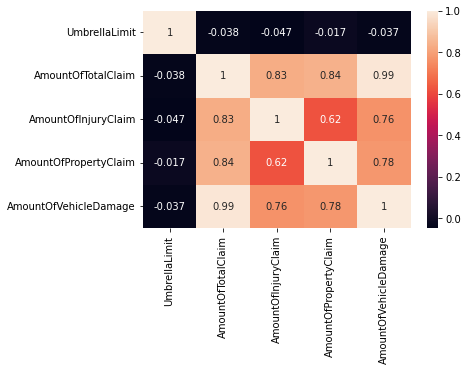

In [117]:
import seaborn as sn
sns.heatmap(s1.corr(),annot=True)

We observed that **'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage'** are highly correlated with '**AmountOfTotalClaim'**
So, we can drop those three columns

In [118]:
combined_train_final= combined_train_final.drop(['AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage'],axis=1)

### Dropping the columns

In [119]:
combined_train_final.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,...,year_of_Date_of_policy_coverage,month_of_Date_of_policy_coverage,day_of_Date_of_policy_coverage,amount_of_bodily_injured,total_amount_per_accident,State_city,loyalty_ranges,Time_period,Insuredage_period,net_amount
0,Multi-vehicle Collision,Side Collision,3,Police,17.0,3,YES,1,0.0,NO,...,1998,10,25,100,300,State7City1,Newcustomers,Evening,Youngadults,8200
1,Multi-vehicle Collision,Side Collision,3,Police,10.0,3,YES,2,1.0,YES,...,2000,11,15,100,300,State7City5,Recentcustomers,Afternoon,Youngadults,22100
2,Single Vehicle Collision,Side Collision,1,Other,22.0,1,YES,2,3.0,NO,...,2001,02,12,500,1000,State8City6,Recentcustomers,Night,Youngadults,2700
3,Single Vehicle Collision,Side Collision,1,Other,22.0,1,YES,2,3.0,NO,...,2005,04,11,500,1000,State9City6,Recentcustomers,Night,Youngadults,-25500
4,Single Vehicle Collision,Rear Collision,1,Fire,10.0,1,NO,2,1.0,YES,...,1996,10,25,100,300,State8City6,Recentcustomers,Afternoon,Youngadults,-41500


###**Converting datatypes and separating num and cat cols again after some preprocessing steps**

In [120]:
combined_train_final.dtypes

TypeOfIncident                      category
TypeOfCollission                      object
SeverityOfIncident                     int64
AuthoritiesContacted                category
IncidentTime                         float64
NumberOfVehicles                       int64
PropertyDamage                        object
BodilyInjuries                         int64
Witnesses                            float64
PoliceReport                          object
AmountOfTotalClaim                     int64
InsuredAge                             int64
InsuredZipCode                      category
InsuredGender                         object
InsuredEducationLevel                  int64
InsuredOccupation                   category
InsuredHobbies                      category
CapitalGains                           int64
CapitalLoss                            int64
CustomerLoyaltyPeriod                  int64
InsurancePolicyState                category
Policy_Deductible                      int64
PolicyAnnu

In [121]:
for col in['TypeOfCollission', 'PropertyDamage', 'PoliceReport', 'InsuredGender', 'vehicle_Make','Insuredage_period','loyalty_ranges','Time_period']:
    combined_train_final[col]= combined_train_final[col].astype('category')
combined_train_final.dtypes

TypeOfIncident                      category
TypeOfCollission                    category
SeverityOfIncident                     int64
AuthoritiesContacted                category
IncidentTime                         float64
NumberOfVehicles                       int64
PropertyDamage                      category
BodilyInjuries                         int64
Witnesses                            float64
PoliceReport                        category
AmountOfTotalClaim                     int64
InsuredAge                             int64
InsuredZipCode                      category
InsuredGender                       category
InsuredEducationLevel                  int64
InsuredOccupation                   category
InsuredHobbies                      category
CapitalGains                           int64
CapitalLoss                            int64
CustomerLoyaltyPeriod                  int64
InsurancePolicyState                category
Policy_Deductible                      int64
PolicyAnnu

In [122]:
#sepreating numerical and categorical columns again after few analysis
numericalcolumns=[]
categoricalcolumns=[]
datetypecolumns=[]
for i in combined_train_final.columns:
  if combined_train_final[i].dtypes=="category":
    categoricalcolumns.append(i)
  elif combined_train_final[i].dtypes=="datetime64[ns]": 
    datetypecolumns.append(i) 
  else:
    numericalcolumns.append(i)

In [123]:
categoricalcolumns

['TypeOfIncident',
 'TypeOfCollission',
 'AuthoritiesContacted',
 'PropertyDamage',
 'PoliceReport',
 'InsuredZipCode',
 'InsuredGender',
 'InsuredOccupation',
 'InsuredHobbies',
 'InsurancePolicyState',
 'InsuredRelationship',
 'vehicle_Make',
 'vehicle_Model',
 'ReportedFraud',
 'month_of_Date_of_incident',
 'month_of_Date_of_policy_coverage',
 'State_city',
 'loyalty_ranges',
 'Time_period',
 'Insuredage_period']

In [124]:
numericalcolumns

['SeverityOfIncident',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfTotalClaim',
 'InsuredAge',
 'InsuredEducationLevel',
 'CapitalGains',
 'CapitalLoss',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit',
 'vehicle_YOM',
 'day_of_Date_of_incident',
 'year_of_Date_of_policy_coverage',
 'day_of_Date_of_policy_coverage',
 'amount_of_bodily_injured',
 'total_amount_per_accident',
 'net_amount']

### **outlier analysis for numerical columns**

first we will plot all the boxplots at once for these columns then we will check which columns are havind outliers and how to treat them effictively

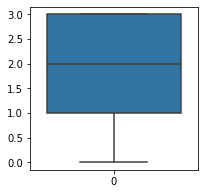

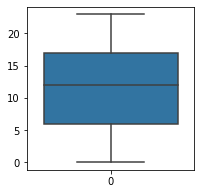

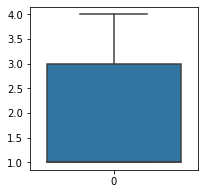

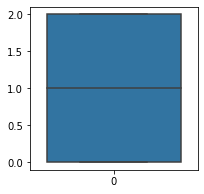

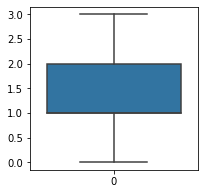

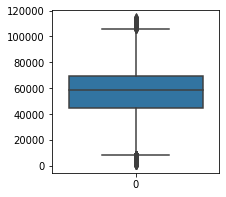

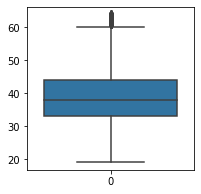

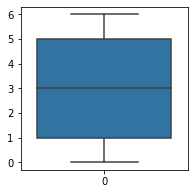

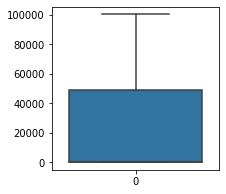

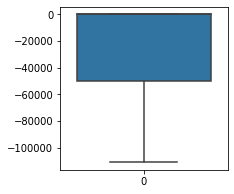

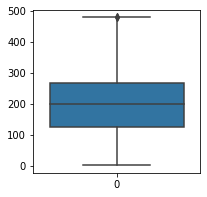

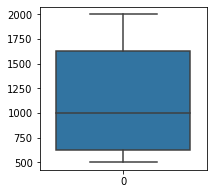

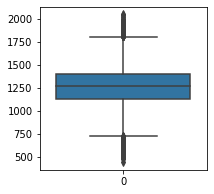

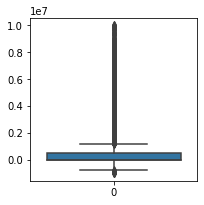

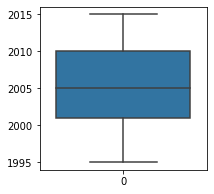

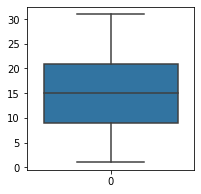

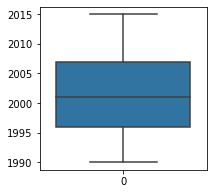

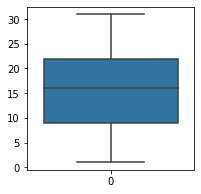

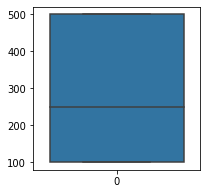

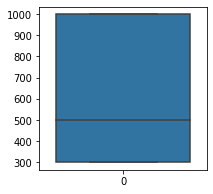

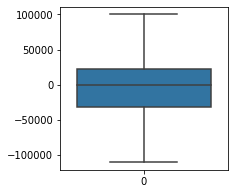

In [125]:
for i in numericalcolumns:
  
  plt.figure(figsize=(3,3))
  sns.boxplot(combined_train_final[i])
  plt.show()

In [126]:
#percentage of outliers present in each column
for i in numericalcolumns:
    
 IQR = (combined_train_final[i]).quantile(0.75) - (combined_train_final[i]).quantile(0.25)
 Upper_limit = (combined_train_final[i]).quantile(0.75) + IQR*1.5
 lower_limit = (combined_train_final[i]).quantile(0.25) - IQR*1.5
 print(i,round(100.0 * len(combined_train_final[(combined_train_final[i])>Upper_limit])/len(combined_train_final), 2)+round(100.0 * len(combined_train_final[(combined_train_final[i])<lower_limit])/len(combined_train_final), 2))

SeverityOfIncident 0.0
IncidentTime 0.0
NumberOfVehicles 0.0
BodilyInjuries 0.0
Witnesses 0.0
AmountOfTotalClaim 17.17
InsuredAge 0.61
InsuredEducationLevel 0.0
CapitalGains 0.0
CapitalLoss 0.0
CustomerLoyaltyPeriod 0.01
Policy_Deductible 0.0
PolicyAnnualPremium 1.06
UmbrellaLimit 22.39
vehicle_YOM 0.0
day_of_Date_of_incident 0.0
year_of_Date_of_policy_coverage 0.0
day_of_Date_of_policy_coverage 0.0
amount_of_bodily_injured 0.0
total_amount_per_accident 0.0
net_amount 0.0


from the plots above **policyannualpremium,Umbrellalimit,ammount of total claim,InsuredAge,CustomerLoyaltyPeriod** seems to have outliers

*************************************************************

**Note:**
columns like **AmountOfTotalClaim,UmbrellaLimit** are having so many outliers and it means 
they are not due to errors and they are actually existing

**************************************************************

**FOR EXAMPLE,**
An **umbrella limit** provides additional liability coverage above and beyond the limits of a primary insurance policy. This means that if a claim exceeds the limits of the primary policy, the umbrella policy can provide additional coverage up to its limit. If the **umbrella limit** is 0, this would generally mean that there is no additional coverage beyond the limits of the primary policy. This could be because the insured did not purchase an umbrella policy or because the umbrella policy has a deductible or exclusion that reduces or eliminates the coverage. It's important to carefully review the terms of the policy to understand what is covered and what is not.

<Axes: >

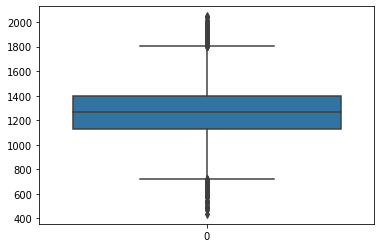

In [127]:
#policyannualpremium
sns.boxplot(combined_train_final['PolicyAnnualPremium'])

Instead of removing the outliers we will use capping to replace it with its respective upper limit and lower limit.

In [128]:
# Replace outliers with respective limit using np.where
IQR = (combined_train_final['PolicyAnnualPremium']).quantile(0.75) - (combined_train_final['PolicyAnnualPremium']).quantile(0.25)
Upper_limit = (combined_train_final['PolicyAnnualPremium']).quantile(0.75) + IQR*1.5
lower_limit = (combined_train_final['PolicyAnnualPremium']).quantile(0.25) - IQR*1.5
combined_train_final['PolicyAnnualPremium']= np.where(combined_train_final['PolicyAnnualPremium']< lower_limit, lower_limit, combined_train_final['PolicyAnnualPremium'])
combined_train_final['PolicyAnnualPremium']= np.where(combined_train_final['PolicyAnnualPremium']> Upper_limit, Upper_limit, combined_train_final['PolicyAnnualPremium'])

<Axes: >

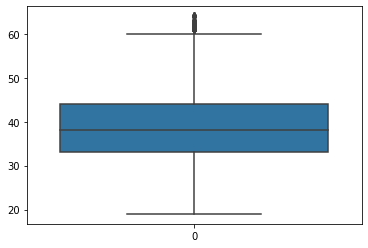

In [129]:
#InsuredAge
sns.boxplot(combined_train_final['InsuredAge'])

In [130]:
"""# Replace outliers with respective limit using np.where
IQR = (combined_train_final['InsuredAge']).quantile(0.75) - (combined_train_final['InsuredAge']).quantile(0.25)
Upper_limit = (combined_train_final['InsuredAge']).quantile(0.75) + IQR*1.5
lower_limit = (combined_train_final['InsuredAge']).quantile(0.25) - IQR*1.5
combined_train_final['InsuredAge']= np.where(combined_train_final['InsuredAge']> Upper_limit, Upper_limit, combined_train_final['InsuredAge'])"""

"# Replace outliers with respective limit using np.where\nIQR = (combined_train_final['InsuredAge']).quantile(0.75) - (combined_train_final['InsuredAge']).quantile(0.25)\nUpper_limit = (combined_train_final['InsuredAge']).quantile(0.75) + IQR*1.5\nlower_limit = (combined_train_final['InsuredAge']).quantile(0.25) - IQR*1.5\ncombined_train_final['InsuredAge']= np.where(combined_train_final['InsuredAge']> Upper_limit, Upper_limit, combined_train_final['InsuredAge'])"

<Axes: >

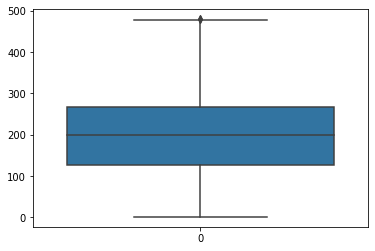

In [131]:
#CustomerLoyaltyPeriod
sns.boxplot(combined_train_final['CustomerLoyaltyPeriod'])

In [132]:
# Replace outliers with respective limit using np.where
IQR = (combined_train_final['CustomerLoyaltyPeriod']).quantile(0.75) - (combined_train_final['CustomerLoyaltyPeriod']).quantile(0.25)
Upper_limit = (combined_train_final['CustomerLoyaltyPeriod']).quantile(0.75) + IQR*1.5
lower_limit = (combined_train_final['CustomerLoyaltyPeriod']).quantile(0.25) - IQR*1.5
combined_train_final['CustomerLoyaltyPeriod']= np.where(combined_train_final['CustomerLoyaltyPeriod']> Upper_limit, Upper_limit, combined_train_final['CustomerLoyaltyPeriod'])

checking whether the outliers replaced or not 

In [133]:
####percentage of outliers present in each column
for i in numericalcolumns:
    
 IQR = (combined_train_final[i]).quantile(0.75) - (combined_train_final[i]).quantile(0.25)
 Upper_limit = (combined_train_final[i]).quantile(0.75) + IQR*1.5
 lower_limit = (combined_train_final[i]).quantile(0.25) - IQR*1.5
 print(i,round(100.0 * len(combined_train_final[(combined_train_final[i])>Upper_limit])/len(combined_train_final), 2)+round(100.0 * len(combined_train_final[(combined_train_final[i])<lower_limit])/len(combined_train_final), 2))

SeverityOfIncident 0.0
IncidentTime 0.0
NumberOfVehicles 0.0
BodilyInjuries 0.0
Witnesses 0.0
AmountOfTotalClaim 17.17
InsuredAge 0.61
InsuredEducationLevel 0.0
CapitalGains 0.0
CapitalLoss 0.0
CustomerLoyaltyPeriod 0.0
Policy_Deductible 0.0
PolicyAnnualPremium 0.0
UmbrellaLimit 22.39
vehicle_YOM 0.0
day_of_Date_of_incident 0.0
year_of_Date_of_policy_coverage 0.0
day_of_Date_of_policy_coverage 0.0
amount_of_bodily_injured 0.0
total_amount_per_accident 0.0
net_amount 0.0


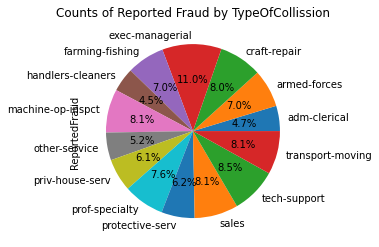

In [134]:
import matplotlib.pyplot as plt
# Compute the mean by 'InsuredOccupation'
counts1 = combined_train_final[combined_train_final['ReportedFraud'] == 1].groupby('InsuredOccupation')['ReportedFraud'].count()
fig,ax=plt.subplots()
# Plot the first pie chart on the first subplot
counts1.plot.pie(autopct='%1.1f%%')
ax.set_title('Counts of Reported Fraud by TypeOfCollission')
plt.show()


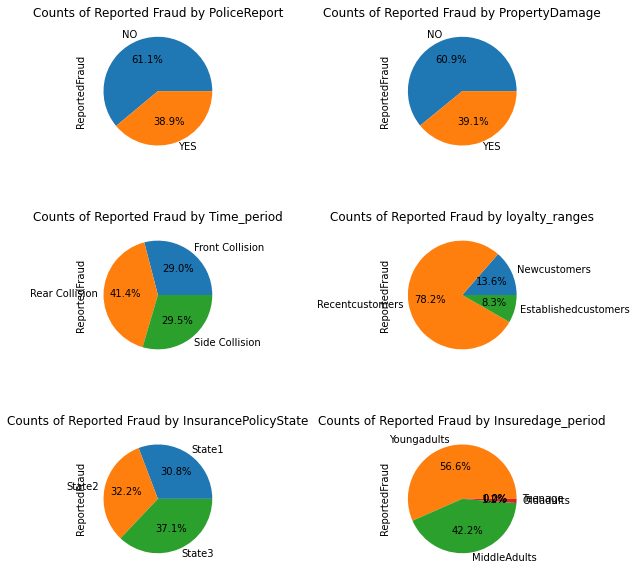

In [135]:
import matplotlib.pyplot as plt
# Compute the mean by 'PoliceReport'
counts1 = combined_train_final[combined_train_final['ReportedFraud'] == 1].groupby('PoliceReport')['ReportedFraud'].count()
# Compute the mean by 'PropertyDamage'
counts2 = combined_train_final[combined_train_final['ReportedFraud'] == 1].groupby('PropertyDamage')['ReportedFraud'].count()
# Compute the mean by 'InsuredEducationLevel'
counts3 = combined_train_final[combined_train_final['ReportedFraud'] == 1].groupby('TypeOfCollission')['ReportedFraud'].count()
# Compute the mean by 'AuthoritiesContacted''
counts4 = combined_train_final[combined_train_final['ReportedFraud'] == 1].groupby('loyalty_ranges')['ReportedFraud'].count()
# Compute the mean by 'InsuredEducationLevel'
counts5 = combined_train_final[combined_train_final['ReportedFraud'] == 1].groupby('InsurancePolicyState')['ReportedFraud'].count()
# Compute the mean by 'AuthoritiesContacted''
counts6 = combined_train_final[combined_train_final['ReportedFraud'] == 1].groupby('Insuredage_period')['ReportedFraud'].count()
# Create a figure with four subplots
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(10,10), gridspec_kw={'wspace': 0.2, 'hspace': 0.5})

# Plot the first pie chart on the first subplot
counts1.plot.pie(ax=ax1, autopct='%1.1f%%')
ax1.set_title('Counts of Reported Fraud by PoliceReport')

# Plot the second pie chart on the second subplot
counts2.plot.pie(ax=ax2, autopct='%1.1f%%')
ax2.set_title('Counts of Reported Fraud by PropertyDamage')

# Plot the third pie chart on the third subplot
counts3.plot.pie(ax=ax3, autopct='%1.1f%%')
ax3.set_title('Counts of Reported Fraud by Time_period')

# Plot the fourth pie chart on the fourth subplot
counts4.plot.pie(ax=ax4, autopct='%1.1f%%')
ax4.set_title('Counts of Reported Fraud by loyalty_ranges')

# Plot the third pie chart on the third subplot
counts5.plot.pie(ax=ax5, autopct='%1.1f%%')
ax5.set_title('Counts of Reported Fraud by InsurancePolicyState')

# Plot the fourth pie chart on the fourth subplot
counts6.plot.pie(ax=ax6, autopct='%1.1f%%')
ax6.set_title('Counts of Reported Fraud by Insuredage_period')

# Display the plot
plt.show()


**INSIGHTS:**
**1)61.1% of the cases which were reported fraud have no police report**
**2)60.9% of the cases which were reported fraud have no property damage**
**3)41.4% of the reported fraud cases  are most when there is rear collision**
**4)79% of the reported fraud cases are by recent customers**
**5 State3 has most no of fraud cases**
**6)most no of reported fraud cases are by young adults**

******************************************************************
Suggestion:-
1)Company should check whether a police report has been filed or not
2)Proper property inspection should be done.
3)Company should focus on conditions where a rear collision is happening.
4)Recent customer behaviour should be monitored whether in order to see there is fraudlent case happening or not
5)In state 3 policy should be checked
6)Young adults should only be allowed to claim with proper reasons


In [136]:
catcols_analysis=['InsurancePolicyState',
 'InsuredGender',
 'TypeOfIncident',
 'TypeOfCollission',
 'SeverityOfIncident',
 'AuthoritiesContacted',
 'PropertyDamage',
 'PoliceReport'
 ]


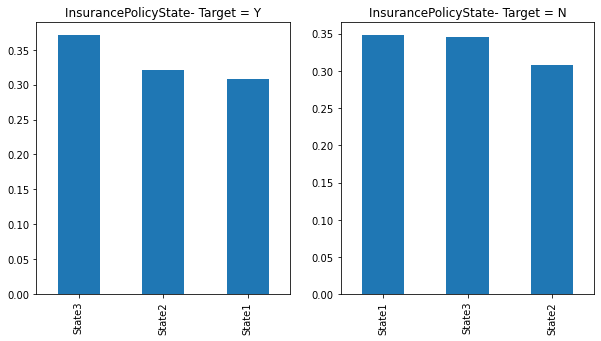

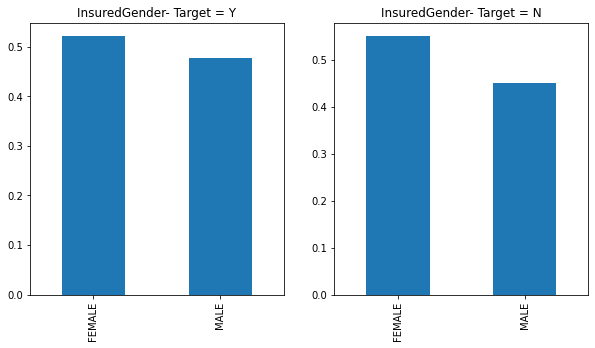

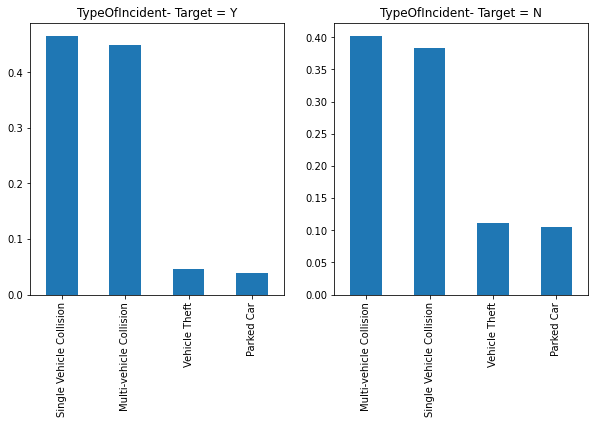

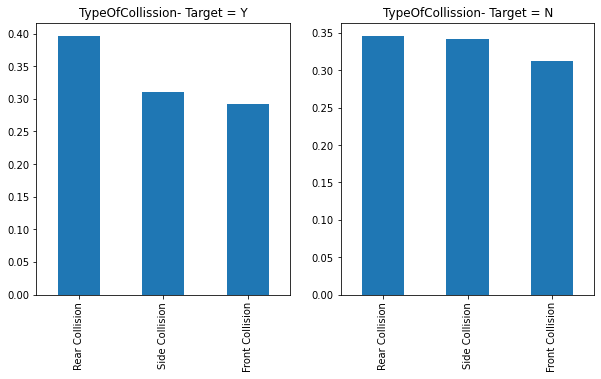

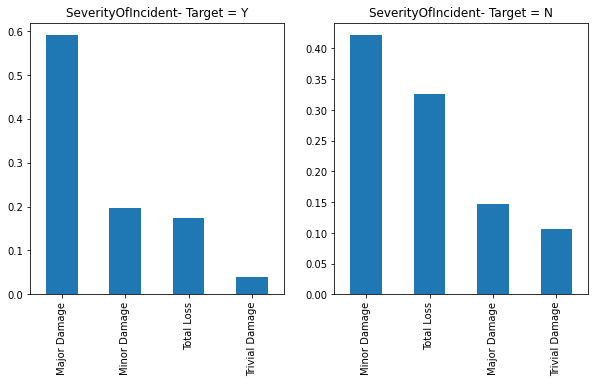

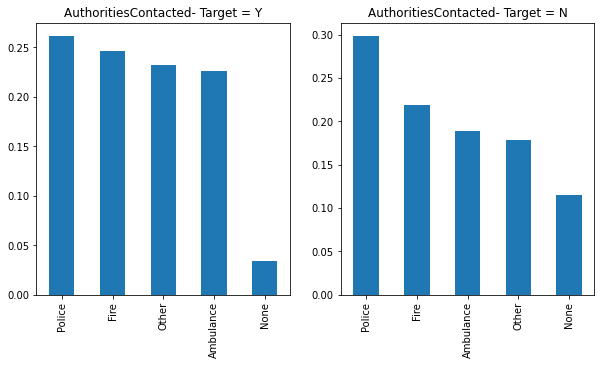

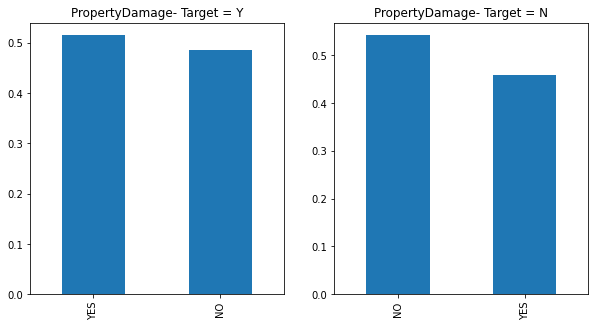

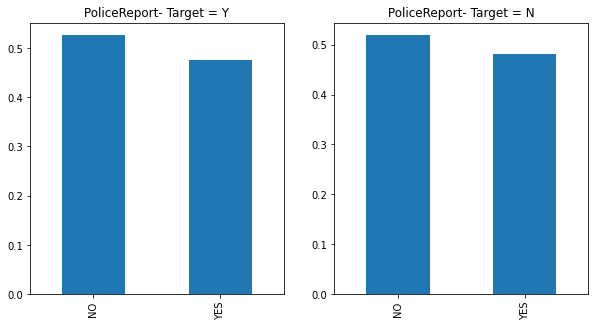

In [137]:
#loop for performing univariate analysis
for i in catcols_analysis:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    fraud_yes[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = Y')
    plt.subplot(1,2,2)
    fraud_no[i].value_counts(normalize=True).plot.bar()
    plt.title(i+ '- Target = N')

**Comments:**

**InsurancePolicyState**: In this state3 experienced more frauds compared to others and state1 experienced less.

**InsuredGender**: In this mostly males are invoved in frauds compared to males.

**Type of Incident**: In this mostly single-vehicle and multi-vehicle collosions involved in more frauds as well as less non fraud and parked car experienced the least

**Severity of incident**: In this major damage experienced the most frauds and minor damage experienced less.

**Police Report**: The non police reported accidents experinced more frauds when compared to reported frauds.

In [140]:
combined_train_final1=combined_train_final.drop(["Time_period"],axis=1)

In [142]:
nums=['SeverityOfIncident','IncidentTime','NumberOfVehicles','BodilyInjuries','Witnesses','AmountOfTotalClaim','InsuredAge','InsuredEducationLevel','CapitalGains','CapitalLoss','CustomerLoyaltyPeriod','Policy_Deductible','PolicyAnnualPremium','UmbrellaLimit','vehicle_YOM','day_of_Date_of_incident','year_of_Date_of_policy_coverage','day_of_Date_of_policy_coverage','amount_of_bodily_injured','total_amount_per_accident','net_amount','ReportedFraud']

**INSIGHTS**

<Axes: xlabel='SeverityOfIncident', ylabel='AmountOfTotalClaim'>

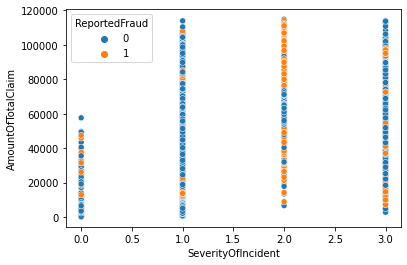

In [143]:
sns.scatterplot(y=combined_train_final1['AmountOfTotalClaim'],x=combined_train_final1['SeverityOfIncident'],hue=combined_train_final1["ReportedFraud"])

#insights from this
1)when severity of incident is 0(there are more fraud cases between 15000 - 50000)

2)when severity of incident is 1(there are few fraud cases between 15000 - 22000 and 75000-82000 and more than 1 lakh also)

3)Highest number of fraud cases were happend when severity of incident is 2. hence when severity is rated 2 company have to be more careful.

4)when severity of incident is 3(there are more fraud cases between 10000 - 20000 and 75000-82000 and more than 1 lakh also).

Suggestion to company-
1)They have to implement strict policies when there is severity of level 2
 
2)Policy check on below whoever is claiming in between 10-20k 

<Axes: xlabel='SeverityOfIncident', ylabel='CapitalLoss'>

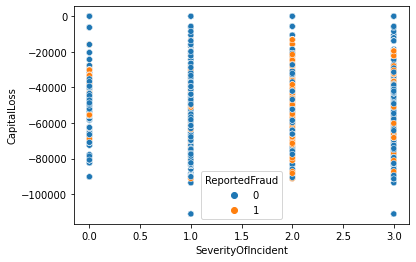

In [144]:
sns.scatterplot(y=combined_train_final1['CapitalLoss'],x=combined_train_final1['SeverityOfIncident'],hue=combined_train_final1["ReportedFraud"])

<Axes: xlabel='InsurancePolicyState', ylabel='AmountOfTotalClaim'>

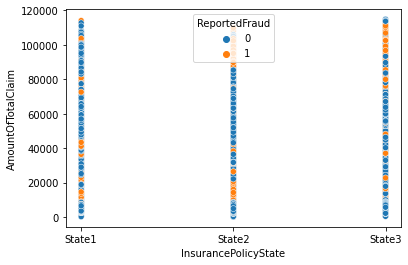

In [145]:
sns.scatterplot(y=combined_train_final1['AmountOfTotalClaim'],x=combined_train_final1['InsurancePolicyState'],hue=combined_train_final1["ReportedFraud"])

**Policies in state2 and state3 should be rechecked for the customers whoever claiming more than 83k**

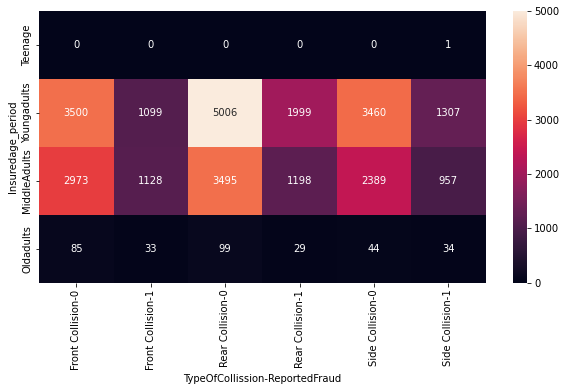

In [212]:
# create a cross-tabulation table to count the number of cases
ct = pd.crosstab(index=combined_train_final1['Insuredage_period'],
                 columns=[combined_train_final1['TypeOfCollission'], combined_train_final1['ReportedFraud']])
# create the heatmap with annotations showing the counts
plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt='d')
plt.show()


**1128 people are been reported fraud in case when age period is Middle adults claiming that they hadfront collision and in case of rear collision with fraud cases there are 5006 people**

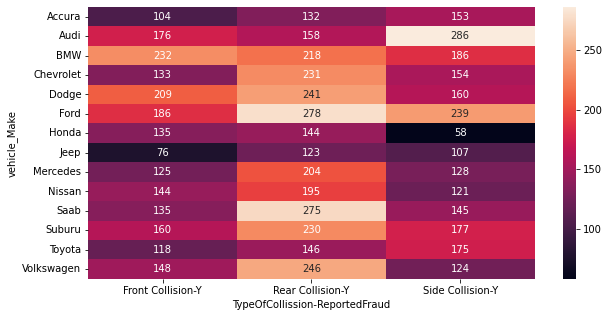

In [218]:
# create a cross-tabulation table to count the number of cases
ct = pd.crosstab(index=fraud_yes['vehicle_Make'],
                 columns=[fraud_yes['TypeOfCollission'], fraud_yes['ReportedFraud']])
# create the heatmap with annotations showing the counts
plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt='d')
plt.show()

**Insight-1)if we see for accura model,fraud cases are more claimed by side collision**
*********************************************************
**Insight-2)if we see for audi model,fraud cases are way more claimed by side collision**
*********************************************************
**Insight-3)if we see for bmw model,fraud cases are more claimed by front and rear collision**
*********************************************************
**Insight-4)if we see for chervolet model,fraud cases are more claimed by rear collision**
*********************************************************
**Insight-5)if we see for dodge model,fraud cases are more claimed by rear collision**
*********************************************************
**Insight-6)if we see for mercedes model,saab model,suburu ,volkswagen fraud cases are more claimed by rear collision**
*********************************************************

**Assiging X and Y** 

In [ ]:
y = combined_train_final["ReportedFraud"]
X = combined_train_final.drop(["ReportedFraud"], axis = 1)

###**TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size=0.3,random_state=107)


In [ ]:
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))


In [ ]:
X_train["SeverityOfIncident"]

In [ ]:
y.value_counts(normalize = True)*100

In [ ]:
y_train.value_counts(normalize = True)*100

In [ ]:
y_test.value_counts(normalize = True)*100

In [ ]:
categoricalcolumns.remove("ReportedFraud")

In [ ]:
categoricalcolumns.remove("vehicle_Model")

In [ ]:
numericalcolumns.remove("SeverityOfIncident")

In [ ]:
numericalcolumns.remove("InsuredEducationLevel")

In [ ]:
categoricalcolumns

In [ ]:
numericalcolumns

### **Dummification**

In [ ]:
"""from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse = False)"""

In [ ]:
X_train_dummification= pd.get_dummies(X_train[categoricalcolumns],drop_first=True)
X_test_dummification= pd.get_dummies(X_test[categoricalcolumns],drop_first=True)

In [ ]:
"""X_train_dummification=pd.DataFrame(encoder.fit_transform(X_train[categoricalcolumns]), columns = encoder.get_feature_names_out())
X_test_dummification=pd.DataFrame(encoder.transform(X_test[categoricalcolumns]), columns = encoder.get_feature_names_out())"""

In [ ]:
X_train_dummification

In [ ]:
X_test_dummification

In [ ]:
X_train_dummification = X_train_dummification.reset_index()
X_train_dummification = X_train_dummification.drop(["index"], axis = 1)
X_train_dummification

In [ ]:
X_test_dummification = X_test_dummification.reset_index()
X_test_dummification = X_test_dummification.drop(["index"], axis = 1)
X_test_dummification

###**Standardisation**

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler = standard_scaler.fit(X_train[numericalcolumns])

In [ ]:
X_train_std = pd.DataFrame(standard_scaler.transform(X_train[numericalcolumns]), columns = X_train[numericalcolumns].columns)
X_test_std = pd.DataFrame(standard_scaler.transform(X_test[numericalcolumns]), columns = X_test[numericalcolumns].columns)

In [ ]:
X_train_std = X_train_std.reset_index()
X_train_std = X_train_std.drop(["index"], axis = 1)
X_train_std


In [ ]:
X_test_std = X_test_std.reset_index()
X_test_std = X_test_std.drop(["index"], axis = 1)
X_test_std

###**Concatination after dummification and standardisation**

In [ ]:
final_X_train_data = pd.concat([X_train_std,X_train_dummification], axis = 1)
final_X_test_data = pd.concat([X_test_std,X_test_dummification], axis = 1)

In [ ]:
final_X_train_data1.head()

In [ ]:
ord_train_cols=pd.DataFrame(X_train[['SeverityOfIncident', 'InsuredEducationLevel']])
ord_train_cols.reset_index(inplace=True)
ord_train_cols.drop(['index'],axis=1,inplace=True)

In [ ]:
ord_test_cols=pd.DataFrame(X_test[['SeverityOfIncident', 'InsuredEducationLevel']])
ord_test_cols.reset_index(inplace=True)
ord_test_cols.drop(['index'],axis=1,inplace=True)

In [ ]:
final_X_train_data1= pd.concat([final_X_train_data, ord_train_cols],axis=1)

In [ ]:
final_X_test_data1= pd.concat([final_X_test_data, ord_test_cols],axis=1)

In [ ]:
final_X_train_data1.shape

In [ ]:
final_X_test_data1.shape

###**Handling imbalance**

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_train_res,y_train_res = smk.fit_resample(final_X_train_data1,y_train)

In [ ]:
X_train_res

In [ ]:
y_train_res

In [ ]:
y_train_res.value_counts(normalize = True)*100

### **Model Building**

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT_model_1 = DT.fit(X_train_res,y_train_res)


In [ ]:
DT_model_1_y_train_predictions = DT_model_1.predict(X_train_res)
DT_model_1_y_train_predictions[0:10]


In [ ]:
DT_model_1_y_test_predictions = DT_model_1.predict(final_X_test_data1)
DT_model_1_y_test_predictions[0:10]

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
confusionmatrix = confusion_matrix(y_train_res,DT_model_1_y_train_predictions)
confusionmatrix

In [ ]:
accuracy_score(y_train_res,DT_model_1_y_train_predictions)

In [ ]:
accuracy_score(y_test,DT_model_1_y_test_predictions)

In [ ]:
precision_score(y_train_res,DT_model_1_y_train_predictions)

In [ ]:
precision_score(y_test,DT_model_1_y_test_predictions)

In [ ]:
f1_score(y_train_res,DT_model_1_y_train_predictions)

In [ ]:
f1_score(y_test,DT_model_1_y_test_predictions)

**Patterns using decision tree**

In [ ]:
from sklearn.tree import export_text
rules = export_text(DT, feature_names=X_train_res.columns.tolist())

In [ ]:
# Sort rules by importance scores and select the top 20 rules
rule_scores = DT.feature_importances_
rule_list = rules.split('\n')
rule_list.pop() # Remove the last empty element
rule_importance = [(rule, score) for rule, score in zip(rule_list, rule_scores)]
rule_importance_sorted = sorted(rule_importance, key=lambda x: x[1], reverse=True)
top_20_rules = [rule for rule, score in rule_importance_sorted[:20]]

# Print the top 20 rules
print("Top 20 rules:")
for rule in top_20_rules:
    print(rule)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC1 = RandomForestClassifier()
RFC_model_1 = RFC1.fit(X_train_res,y_train_res)
RFC_model_1_y_train_preds = RFC_model_1.predict(X_train_res)
RFC_model_1_y_train_preds[0:10]

In [ ]:
RFC_model_1_y_test_preds = RFC_model_1.predict(final_X_test_data1)
RFC_model_1_y_test_preds[0:10]

In [ ]:
f1_score(y_train_res,RFC_model_1_y_train_preds)


In [ ]:
f1_score(y_test,RFC_model_1_y_test_preds)


In [ ]:
rfclf = RandomForestClassifier(criterion= 'entropy', 
                                max_depth= None, 
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                ccp_alpha=0.0001)
rfclf= rfclf.fit(X_train_res, y_train_res)
y_pred_train_rfc =rfclf.predict(X_train_res)
y_pred_val_rfc = rfclf.predict(final_X_test_data1)

In [ ]:
f1_score(y_train_res,y_pred_train_rfc)

In [ ]:
f1_score(y_test,y_pred_val_rfc)

In [ ]:
accuracy_score(y_train_res,y_pred_train_rfc)

In [ ]:
accuracy_score(y_test,y_pred_val_rfc)

In [ ]:
plot_learning_curve(RFC1, "Learning Curve (RFC)", X_train_res, y_train_res, cv=5)
plt.show()

**SVM**

In [ ]:
from sklearn import svm
# Train an SVM model
SVM1 = svm.SVC(kernel='linear', C=1)
svm_model_1=SVM1.fit(X_train_res, y_train_res)
SVM_model_1_y_train_preds = svm_model_1.predict(X_train_res)
SVM_model_1_y_train_preds[0:10]

In [ ]:
# Make predictions on the testing set and evaluate F1_score
SVM_model_1_y_test_preds = svm_model_1.predict(final_X_test_data1)
SVM_model_1_y_test_preds[0:10]

In [ ]:
f1_score(y_train_res,SVM_model_1_y_train_preds)

In [ ]:
f1_score(y_test,SVM_model_1_y_test_preds)

In [ ]:
accuracy_score(y_train_res,SVM_model_1_y_train_preds)

In [ ]:
accuracy_score(y_test,SVM_model_1_y_test_preds)

In [ ]:
from sklearn import svm
# Train an SVM model
SVM11 = svm.SVC(kernel='rbf', C=1)
svm_model_11=SVM11.fit(final_X_train_data1, y_train)
SVM_model_11_y_train_preds = svm_model_11.predict(final_X_train_data1)
SVM_model_11_y_train_preds[0:10]

In [ ]:
SVM_model_11_y_test_preds = svm_model_11.predict(final_X_test_data1)
SVM_model_11_y_test_preds[0:10]

In [ ]:
f1_score(y_train,SVM_model_11_y_train_preds)

In [ ]:
f1_score(y_test,SVM_model_11_y_test_preds)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_model_1=logistic_regression.fit(X_train_res, y_train_res)
logistic_model_1_y_train_preds = logistic_model_1.predict(X_train_res)
logistic_model_1_y_train_preds[0:10]

In [ ]:
# Make predictions on the testing set and evaluate accuracy
logistic_model_1_y_test_preds = logistic_model_1.predict(final_X_test_data1)
logistic_model_1_y_test_preds[0:10]

In [ ]:
f1_score(y_train_res,logistic_model_1_y_train_preds)

In [ ]:
f1_score(y_test,logistic_model_1_y_test_preds)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression1 = LogisticRegression(C=10, penalty= 'l1', solver ='liblinear')
logistic_model_2=logistic_regression1.fit(X_train_res, y_train_res)
logistic_model_2_y_train_preds = logistic_model_2.predict(X_train_res)
logistic_model_2_y_train_preds[0:10]

In [ ]:
logistic_model_2_y_test_preds = logistic_model_2.predict(final_X_test_data1)
logistic_model_2_y_test_preds[0:10]

In [ ]:
f1_score(y_train_res,logistic_model_2_y_train_preds)

In [ ]:
f1_score(y_test,logistic_model_2_y_test_preds)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create a logistic regression object
logreg = LogisticRegression()

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['lbfgs', 'liblinear']}

# Create a GridSearchCV object
grid = GridSearchCV(logreg, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train_res, y_train_res)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn1= KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_model1= knn1.fit(X_train_res,y_train_res)

In [ ]:
knn_model1_train_pred= knn1.predict(X_train_res)

In [ ]:
knn_model1_testpred= knn1.predict(final_X_test_data1)

In [ ]:
f1_score(y_train_res,knn_model1_train_pred)

In [ ]:
f1_score(y_test,knn_model1_testpred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a KNN object
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 10],
              'metric': ['euclidean', 'manhattan', 'minkowski']}

# Create a GridSearchCV object
grid = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train_res, y_train_res)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


In [ ]:
#hyperparamter tuning for svm
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

# defining parameter range
#param_grid = {'C': [0.1],
#			'gamma': [1, 0.1],
#			'kernel': ['rbf','linear']}

#grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
#grid.fit(X_train_res, y_train_res)

In [ ]:
# print best parameter after tuning
#print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

**C=1, gamma=0.1, kernel=rbf -best parameters I got from here**

**SVM2**

In [ ]:
from sklearn import svm
# Train an SVM model
SVM2 = svm.SVC(kernel='rbf', C=1, gamma=0.1)
svm_model_2=SVM2.fit(X_train_res, y_train_res)
SVM_model_2_y_train_preds = svm_model_2.predict(X_train_res)
SVM_model_2_y_train_preds[0:10]

In [ ]:
# Make predictions on the testing set and evaluate F1_score
SVM_model_2_y_test_preds = svm_model_2.predict(final_X_test_data1)
SVM_model_2_y_test_preds[0:10]

In [ ]:
f1_score(y_train_res,SVM_model_2_y_train_preds)

In [ ]:
f1_score(y_test,SVM_model_2_y_test_preds)

In [ ]:
accuracy_score(y_train_res,SVM_model_2_y_train_preds)

In [ ]:
accuracy_score(y_test,SVM_model_2_y_test_preds)

In [ ]:
from sklearn import svm
# Train an SVM model
SVM3 = svm.SVC(kernel='rbf', C=0.1)
svm_model_3=SVM3.fit(final_X_train_data1, y_train)
SVM_model_3_y_train_preds = svm_model_3.predict(final_X_train_data1)
SVM_model_3_y_train_preds[0:10]

In [ ]:
SVM_model_3_y_test_preds = svm_model_3.predict(final_X_test_data1)
SVM_model_3_y_test_preds[0:10]

In [ ]:
f1_score(y_train,SVM_model_3_y_train_preds)

In [ ]:
f1_score(y_test,SVM_model_3_y_test_preds)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost object
xgb = XGBClassifier()

# Define the parameter grid
param_grid = {'learning_rate': [0.01, 0.1, 1],
              'max_depth': [3, 5, 7],
              'min_child_weight': [1, 3, 5],
              'subsample': [0.5, 0.7, 1],
              'gamma': [0, 0.1, 0.5],
              'reg_lambda': [0, 1, 10]}

# Create a GridSearchCV object
grid = GridSearchCV(xgb, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid.fit(X_train_res, y_train_res)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)


**Learning Curves**

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [ ]:
plot_learning_curve(SVM2, "Learning Curve (SVM, rbf kernel)", X_train_res, y_train_res, cv=5)
plt.show()

###**Applying on Test data**

In [ ]:
test_claim=pd.read_csv("/content/Test_Claim.csv",na_values=['?','-5','MISSINGVALUE','MISSEDDATA'])
test_claim.head()

In [ ]:
test_demo=pd.read_csv("/content/Test_Demographics.csv",na_values=['NA'])
test_demo.head()

In [ ]:
test_policy=pd.read_csv("/content/Test_Policy.csv",na_values=['-1','MISSINGVAL','NA'])
test_policy.head()

In [ ]:
test_vehicle=pd.read_csv("/content/Test_Vehicle.csv",na_values=['???'])
test_vehicle.tail()

In [ ]:
print("shape_of_test_vehicle",shape(test_vehicle))
print("shape_of_test_policy",shape(test_policy))
print("shape_of_test_claim",shape(test_claim))
print("shape_of_test_demo",shape(test_demo))

In [ ]:
test_vehicle["VehicleAttribute"].describe()

In [ ]:
vehicle_id= test_vehicle.query('VehicleAttribute=="VehicleID"')
vehicle_Model= test_vehicle.query('VehicleAttribute=="VehicleModel"')
vehicle_Make= test_vehicle.query('VehicleAttribute=="VehicleMake"')
vehicle_YOM= test_vehicle.query('VehicleAttribute=="VehicleYOM"')

In [ ]:
vehicle_id= vehicle_id.rename(columns={'VehicleAttributeDetails': 'vehicle_id'})
vehicle_Make= vehicle_Make.rename(columns={'VehicleAttributeDetails': 'vehicle_Make'})
vehicle_YOM= vehicle_YOM.rename(columns={'VehicleAttributeDetails': 'vehicle_YOM'})
vehicle_Model= vehicle_Model.rename(columns={'VehicleAttributeDetails': 'vehicle_Model'})

In [ ]:
vehicle_Model.head()

In [ ]:
vehicle_id=vehicle_id.drop(["VehicleAttribute"],axis=1)
vehicle_Model=vehicle_Model.drop(["VehicleAttribute"],axis=1)
vehicle_YOM=vehicle_YOM.drop(["VehicleAttribute"],axis=1)
vehicle_Make=vehicle_Make.drop(["VehicleAttribute"],axis=1)

In [ ]:
### merging the splitted columns
merged_df = pd.merge(vehicle_Make,vehicle_YOM,on='CustomerID')
merged_df1 = pd.merge(vehicle_Model,vehicle_id,on='CustomerID')
test_vehicle=pd.merge(merged_df,merged_df1,on='CustomerID')

In [ ]:
test_vehicle.shape

In [ ]:
combined_test=test_claim.merge(test_demo, on="CustomerID").merge(test_policy, on="CustomerID").merge(test_vehicle, on="CustomerID")

In [ ]:
combined_test

In [ ]:
combined_test['year_of_Date_of_incident']=combined_test['DateOfIncident'].apply(lambda x:x.split('-')[0])
combined_test['month_of_Date_of_incident']=combined_test['DateOfIncident'].apply(lambda x:x.split('-')[1])
combined_test['day_of_Date_of_incident']=combined_test['DateOfIncident'].apply(lambda x:x.split('-')[2])

In [ ]:
combined_test['year_of_Date_of_policy_coverage']=combined_test['DateOfPolicyCoverage'].apply(lambda x:x.split('-')[0])
combined_test['month_of_Date_of_policy_coverage']=combined_test['DateOfPolicyCoverage'].apply(lambda x:x.split('-')[1])
combined_test['day_of_Date_of_policy_coverage']=combined_test['DateOfPolicyCoverage'].apply(lambda x:x.split('-')[2])

In [ ]:
combined_test['amount_of_bodily_injured']=combined_test['Policy_CombinedSingleLimit'].apply(lambda x:x.split('/')[0])
combined_test['total_amount_per_accident']=combined_test['Policy_CombinedSingleLimit'].apply(lambda x:x.split('/')[1])

In [ ]:
combined_test['State_city'] = combined_test['IncidentState'].astype(str) + combined_test['IncidentCity']

In [ ]:
combined_test["DateOfIncident"] = combined_test["DateOfIncident"].astype('datetime64') 
combined_test["DateOfPolicyCoverage"] = combined_test["DateOfPolicyCoverage"].astype('datetime64')

In [ ]:
for col in['CustomerID', 'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
           'IncidentAddress', 'PropertyDamage', 'PoliceReport','InsuredZipCode','InsuredGender','InsuredEducationLevel', 'InsuredOccupation',
           'InsuredHobbies', 'Country', 'InsurancePolicyState', 'InsuredRelationship','vehicle_Make', 'vehicle_Model', 'vehicle_id',
           'month_of_Date_of_incident', 'month_of_Date_of_policy_coverage','State_city']:
    combined_test[col]= combined_test[col].astype('category')

In [ ]:
for col in['total_amount_per_accident', 'amount_of_bodily_injured', 'year_of_Date_of_incident', 'day_of_Date_of_policy_coverage', 'year_of_Date_of_policy_coverage', 'day_of_Date_of_incident', 'vehicle_YOM',]:
    combined_test[col]= combined_test[col].astype('int64')

In [ ]:
combined_test= combined_test.drop(['DateOfIncident', 'IncidentAddress', 'InsuredZipCode','InsuredEducationLevel',
                                     'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyNumber', 'DateOfPolicyCoverage', 'Policy_CombinedSingleLimit'
                                     , 'InsuredRelationship', 'vehicle_id', 'Country', 'year_of_Date_of_incident','IncidentState','IncidentCity' ],axis=1)

In [ ]:
combined_test.isnull().sum()

In [ ]:
combined_test["AmountOfTotalClaim"]= combined_test["AmountOfInjuryClaim"]+combined_test["AmountOfPropertyClaim"]+combined_test["AmountOfVehicleDamage"]
combined_test["PolicyAnnualPremium"].replace(np.nan,combined_test["PolicyAnnualPremium"].mean(),inplace=True)
combined_test["Witnesses"].replace(np.nan,combined_test["Witnesses"].mode().values[0],inplace=True)
combined_test["IncidentTime"].replace(np.nan,combined_test["IncidentTime"].median(),inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
cat_cols_imputer = SimpleImputer(strategy='most_frequent')
cat_cols_imputer.fit(combined_test[impute_cols])

In [ ]:
combined_test[impute_cols] = cat_cols_imputer.transform(combined_test[impute_cols])

In [ ]:
combined_test.isnull().sum()

In [ ]:
combined_test_final = combined_test.copy()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
    
###df = pd.DataFrame({'A': ['x', np.NaN, 'z'], 'B': [1, 6, 9], 'C': [2, 1, np.NaN]})

enc = LabelEncoder()

combined_test = combined_test.apply(
    lambda series: pd.Series(enc.fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
    ))


In [ ]:
imputer = KNNImputer(n_neighbors=3)
combined_test_imputed=imputer.fit_transform(combined_test)
combined_test_imputed = pd.DataFrame(combined_test_imputed, columns=combined_test.columns)

In [ ]:
combined_test_final["TypeOfCollission"] = combined_test_imputed["TypeOfCollission"].apply(lambda x : int(x))
combined_test_final["PropertyDamage"] = combined_test_imputed["PropertyDamage"].apply(lambda x : int(x))
combined_test_final["PoliceReport"] = combined_test_imputed["PoliceReport"].apply(lambda x : int(x))

In [ ]:
combined_test_final["TypeOfCollission"] = combined_test_final["TypeOfCollission"].replace (to_replace = [2,1,0],value = ['Side Collision','Rear Collision','Front Collision'])
combined_test_final["PropertyDamage"] = combined_test_final["PropertyDamage"].replace (to_replace = [1,0],value = ["YES","NO"])
combined_test_final["PoliceReport"] = combined_test_final["PoliceReport"].replace (to_replace = [1,0],value = ["YES","NO"])


In [ ]:
combined_test_final

In [ ]:
combined_test_final= combined_test_final.drop(['AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage'],axis=1)

### Dropping the columns

In [ ]:
for col in['TypeOfCollission', 'PropertyDamage', 'PoliceReport', 'InsuredGender', 'vehicle_Make']:
    combined_test_final[col]= combined_test_final[col].astype('category')
combined_test_final.dtypes

In [ ]:
numericalcolumns

In [ ]:
categoricalcolumns

**Check whether any missing column between train and test data**

In [ ]:
missing_category = set(combined_train_final['vehicle_Model']) - set(combined_test_final['vehicle_Model'])


In [ ]:
missing_category

In [ ]:
"""X_test_dummification1=pd.DataFrame(encoder.transform(combined_test_final[categoricalcolumns]), columns = encoder.get_feature_names_out())"""

In [ ]:
X_test_dummification1= pd.get_dummies(combined_test_final[categoricalcolumns],drop_first=True)

In [ ]:
X_test_dummification1 = X_test_dummification1.reset_index()
X_test_dummification1

In [ ]:
X_test_dummification1 = X_test_dummification1.drop(["index"], axis = 1)
X_test_dummification1

In [ ]:
standard_scaler1 = standard_scaler.fit(combined_test_final[numericalcolumns])

In [ ]:
X_test_std1 = pd.DataFrame(standard_scaler1.transform(combined_test_final[numericalcolumns]), columns = combined_test_final[numericalcolumns].columns)
X_test_std1 = X_test_std1.reset_index()
X_test_std1 = X_test_std1.drop(["index"], axis = 1)
X_test_std1

In [ ]:
Final_TEST_data = pd.concat([X_test_std1,X_test_dummification1], axis = 1)

In [ ]:
FINAL_preds =svm_model_2.predict(Final_TEST_data)
FINAL_preds[0:]

In [ ]:
CSV=pd.DataFrame()

In [ ]:
CSV["CustomerID"]=combined_test_final["CustomerID"]
CSV["FINAL_preds"]=FINAL_preds

In [ ]:
CSV

In [ ]:
CSV["FINAL_preds"].value_counts()

In [ ]:
# save dataframe to a csv file
CSV.to_csv('my_final_predictions2.csv', index=False)

In [ ]:
pwd